# Electric Vehicle Classification

<font size="5">Background</font>
<p style='text-align: justify;'> With the burgeoning electric vehicle market, precise classification of electric vehicle types becomes pivotal for stakeholders such as manufacturers, policymakers, and consumers. This project addresses the growing need for accurate categorization of Battery Electric Vehicles (BEV) and Plug-in Hybrid Electric Vehicles (PHEV) to inform infrastructure planning, policy formulation, and targeted market strategies, thereby contributing to the evolution of electric vehicle research and decision-making processes.</p>

<font size="5">Objective</font>
<p style='text-align: justify;'> This project aims to develop a robust classification model capable of accurately differentiating between BEVs and PHEVs. The primary goal is to gain comprehensive insights into the distribution and characteristics of these electric vehicle types, empowering stakeholders with valuable information for informed decision-making in the realms of infrastructure development, policy implementation, and market targeting.</p>

<font size="5">Dataset:</font>
<p style='text-align: justify;'> Electric Vehicle Population. </p>

(https://catalog.data.gov/dataset/electric-vehicle-population-data)

# Import Libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from prettytable import PrettyTable

import warnings
warnings.filterwarnings('ignore')

# modeling
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# splitting data and model evaluation
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, make_scorer, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# sampling
from imblearn.under_sampling import NearMiss
from collections import Counter

# cross-validation and hyperparameter tuning
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV

# feature importance
import shap

# Load Dataset

In [2]:
# load data in dataframe
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [3]:
# Display 1st 5 rows of dataframe
df.head(5)

VIN (1-10)    County       City State  Postal Code  Model Year    Make  \
0  5YJYGDEF5L  Thurston      Lacey    WA      98516.0        2020   TESLA   
1  1N4BZ1CP1K      King  Sammamish    WA      98074.0        2019  NISSAN   
2  5YJXCDE28G      King       Kent    WA      98031.0        2016   TESLA   
3  JHMZC5F37M    Kitsap    Poulsbo    WA      98370.0        2021   HONDA   
4  WA1F2AFY4P  Thurston    Olympia    WA      98501.0        2023    AUDI   

     Model                   Electric Vehicle Type  \
0  MODEL Y          Battery Electric Vehicle (BEV)   
1     LEAF          Battery Electric Vehicle (BEV)   
2  MODEL X          Battery Electric Vehicle (BEV)   
3  CLARITY  Plug-in Hybrid Electric Vehicle (PHEV)   
4     Q5 E  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible             291   
1           Clean Alternative Fuel Vehicle Eligible             150   
2           Clean Alternative Fuel Vehicle Eligible             200   
3           Clean Alternative Fuel Vehicle Eligible              47   
4             Not eligible due to low battery range              23   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                  22.0       124535071   
1          0                  45.0       102359449   
2          0                  33.0       228682037   
3          0                  23.0       171566447   
4          0                  22.0       234923230   

                  Vehicle Location  \
0  POINT (-122.7474291 47.0821119)   
1  POINT (-122.0313266 47.6285782)   
2  POINT (-122.2012521 47.3931814)   
3     POINT (-122.64177 47.737525)   
4     POINT (-122.89692 47.043535)   

                                Electric Utility  2020 Census Tract  
0                         PUGET SOUND ENERGY INC       5.306701e+10  
1  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303303e+10  
2  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303303e+10  
3                         PUGET SOUND ENERGY INC       5.303509e+10  
4                         PUGET SOUND ENERGY INC       5.306701e+10

In [4]:
# Display last 5 rows of dataframe
df.tail(5)

VIN (1-10)     County        City State  Postal Code  Model Year  \
162998  7SAYGAEE6P    Whatcom  Bellingham    WA      98225.0        2023   
162999  7SAYGDEE4P       King      Vashon    WA      98070.0        2023   
163000  7SAYGDEE0P  Snohomish     Bothell    WA      98021.0        2023   
163001  JTDKARFP7H     Pierce    Spanaway    WA      98387.0        2017   
163002  3FMTK3SU7N    Spokane     Spokane    WA      99203.0        2022   

          Make           Model                   Electric Vehicle Type  \
162998   TESLA         MODEL Y          Battery Electric Vehicle (BEV)   
162999   TESLA         MODEL Y          Battery Electric Vehicle (BEV)   
163000   TESLA         MODEL Y          Battery Electric Vehicle (BEV)   
163001  TOYOTA     PRIUS PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
163002    FORD  MUSTANG MACH-E          Battery Electric Vehicle (BEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
162998  Eligibility unknown as battery range has not b...               0   
162999  Eligibility unknown as battery range has not b...               0   
163000  Eligibility unknown as battery range has not b...               0   
163001              Not eligible due to low battery range              25   
163002  Eligibility unknown as battery range has not b...               0   

        Base MSRP  Legislative District  DOL Vehicle ID  \
162998          0                  40.0       236252152   
162999          0                  34.0       224470599   
163000          0                   1.0       244676939   
163001          0                   2.0       276466165   
163002          0                   6.0       197399828   

                     Vehicle Location  \
162998  POINT (-122.486115 48.761615)   
162999    POINT (-122.46049 47.44873)   
163000  POINT (-122.179458 47.802589)   
163001    POINT (-122.435115 47.1045)   
163002  POINT (-117.425265 47.635365)   

                                         Electric Utility  2020 Census Tract  
162998  PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...       5.307300e+10  
162999                              CITY OF TACOMA - (WA)       5.303303e+10  
163000                             PUGET SOUND ENERGY INC       5.306105e+10  
163001  BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...       5.305307e+10  
163002                      MODERN ELECTRIC WATER COMPANY       5.306300e+10

In [5]:
# Define shape of dataframe
print('Number of instances(rows):', df.shape[0])
print('Number of features(attributes):', df.shape[1])

Number of instances(rows): 163003
Number of features(attributes): 17


In [6]:
# Define information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163003 entries, 0 to 163002
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         163003 non-null  object 
 1   County                                             162999 non-null  object 
 2   City                                               162999 non-null  object 
 3   State                                              163003 non-null  object 
 4   Postal Code                                        162999 non-null  float64
 5   Model Year                                         163003 non-null  int64  
 6   Make                                               163003 non-null  object 
 7   Model                                              163003 non-null  object 
 8   Electric Vehicle Type                              163003 non-null  object

In [7]:
# Divide features into two categories- numeical and categorical
category = [i for i in df.columns if df[i].dtype == 'object']
numerical = [i for i in df.columns if df[i].dtype != 'object']
print('Number of Numerical Type Features:' ,len(numerical))
print('List of Numerical Type Features:' ,numerical)
print('Number of Numerical Type Features:' , len(category))
print('List of Categorical Type Features:' ,category)

Number of Numerical Type Features: 7
List of Numerical Type Features: ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']
Number of Numerical Type Features: 10
List of Categorical Type Features: ['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location', 'Electric Utility']


In [8]:
# Display Descriptive statistics of dataframe
df.describe().T

count          mean           std           min  \
Postal Code           162999.0  9.817072e+04  2.467999e+03  1.730000e+03   
Model Year            163003.0  2.020258e+03  3.005057e+00  1.997000e+03   
Electric Range        163003.0  6.338218e+01  9.432306e+01  0.000000e+00   
Base MSRP             163003.0  1.198345e+03  8.825506e+03  0.000000e+00   
Legislative District  162637.0  2.922686e+01  1.484172e+01  1.000000e+00   
DOL Vehicle ID        163003.0  2.153918e+08  7.874180e+07  4.385000e+03   
2020 Census Tract     162999.0  5.297368e+10  1.612977e+09  1.081042e+09   

                               25%           50%           75%           max  
Postal Code           9.805200e+04  9.812200e+04  9.837000e+04  9.957700e+04  
Model Year            2.018000e+03  2.021000e+03  2.023000e+03  2.024000e+03  
Electric Range        0.000000e+00  1.300000e+01  8.400000e+01  3.370000e+02  
Base MSRP             0.000000e+00  0.000000e+00  0.000000e+00  8.450000e+05  
Legislative District  1.800000e+01  3.300000e+01  4.200000e+01  4.900000e+01  
DOL Vehicle ID        1.762441e+08  2.209718e+08  2.495753e+08  4.792548e+08  
2020 Census Tract     5.303301e+10  5.303303e+10  5.305307e+10  5.603300e+10

In [9]:
df.describe(include = object).T

count unique  \
VIN (1-10)                                         163003  10086   
County                                             162999    186   
City                                               162999    706   
State                                              163003     45   
Make                                               163003     39   
Model                                              163003    136   
Electric Vehicle Type                              163003      2   
Clean Alternative Fuel Vehicle (CAFV) Eligibility  163003      3   
Vehicle Location                                   162994    842   
Electric Utility                                   162999     75   

                                                                                                 top  \
VIN (1-10)                                                                                7SAYGDEE6P   
County                                                                                          King   
City                                                                                         Seattle   
State                                                                                             WA   
Make                                                                                           TESLA   
Model                                                                                        MODEL Y   
Electric Vehicle Type                                                 Battery Electric Vehicle (BEV)   
Clean Alternative Fuel Vehicle (CAFV) Eligibility  Eligibility unknown as battery range has not b...   
Vehicle Location                                                         POINT (-122.12302 47.67668)   
Electric Utility                                       PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)   

                                                     freq  
VIN (1-10)                                           1025  
County                                              84940  
City                                                27434  
State                                              162637  
Make                                                73587  
Model                                               31640  
Electric Vehicle Type                              127102  
Clean Alternative Fuel Vehicle (CAFV) Eligibility   79957  
Vehicle Location                                     4171  
Electric Utility                                    59975

# Data Preparation 

<font size="4">Missing Values</font>

In [10]:
# Missing/Null Value
df.isnull().sum()

VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 366
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

In [11]:
# show columns that have missing values
df.columns[df.isnull().any()]

Index(['County', 'City', 'Postal Code', 'Legislative District',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

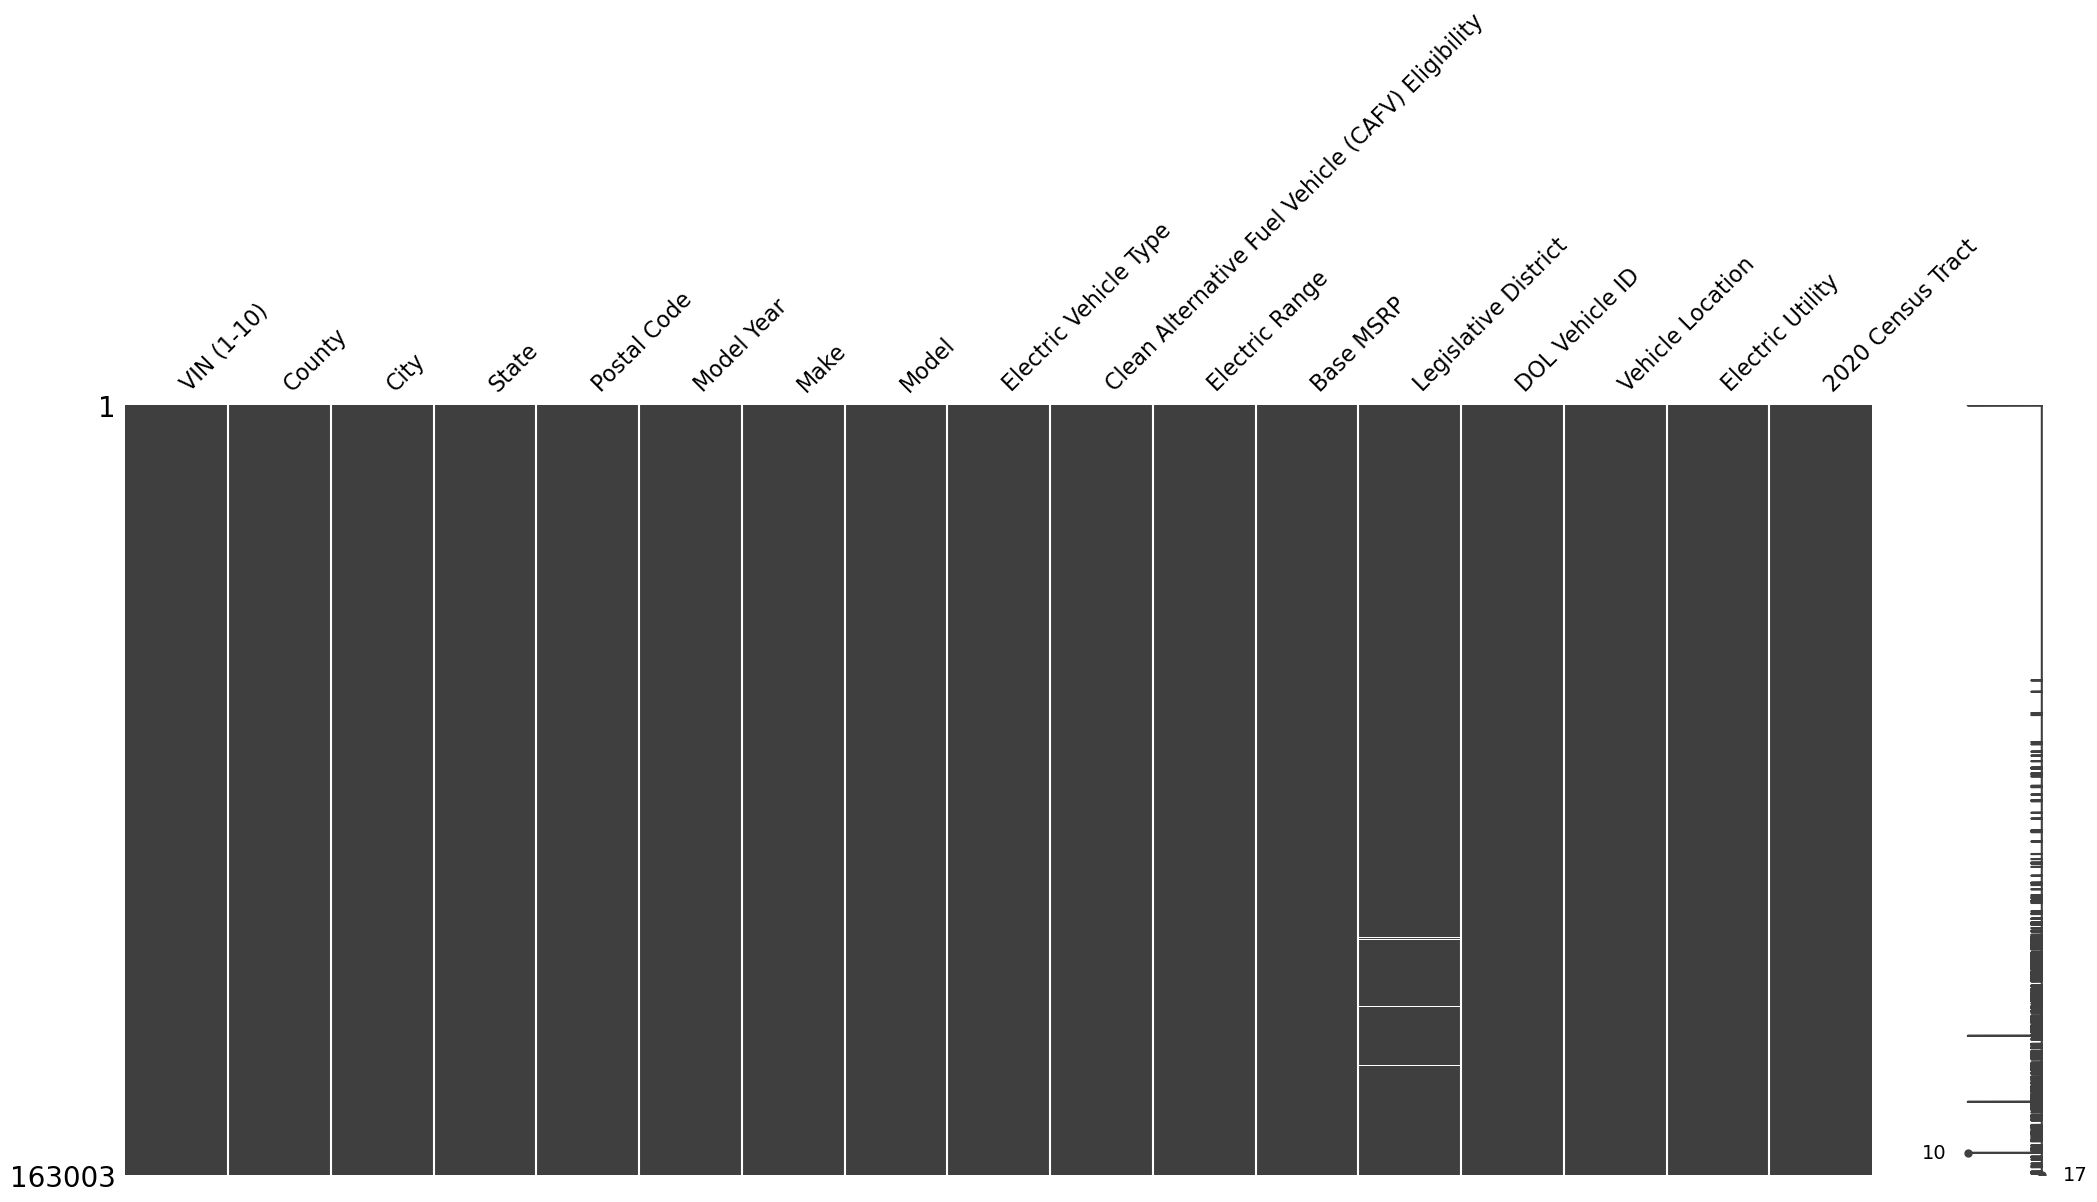

In [12]:
# plotting matrix of missing values
msno.matrix(df)
plt.show()

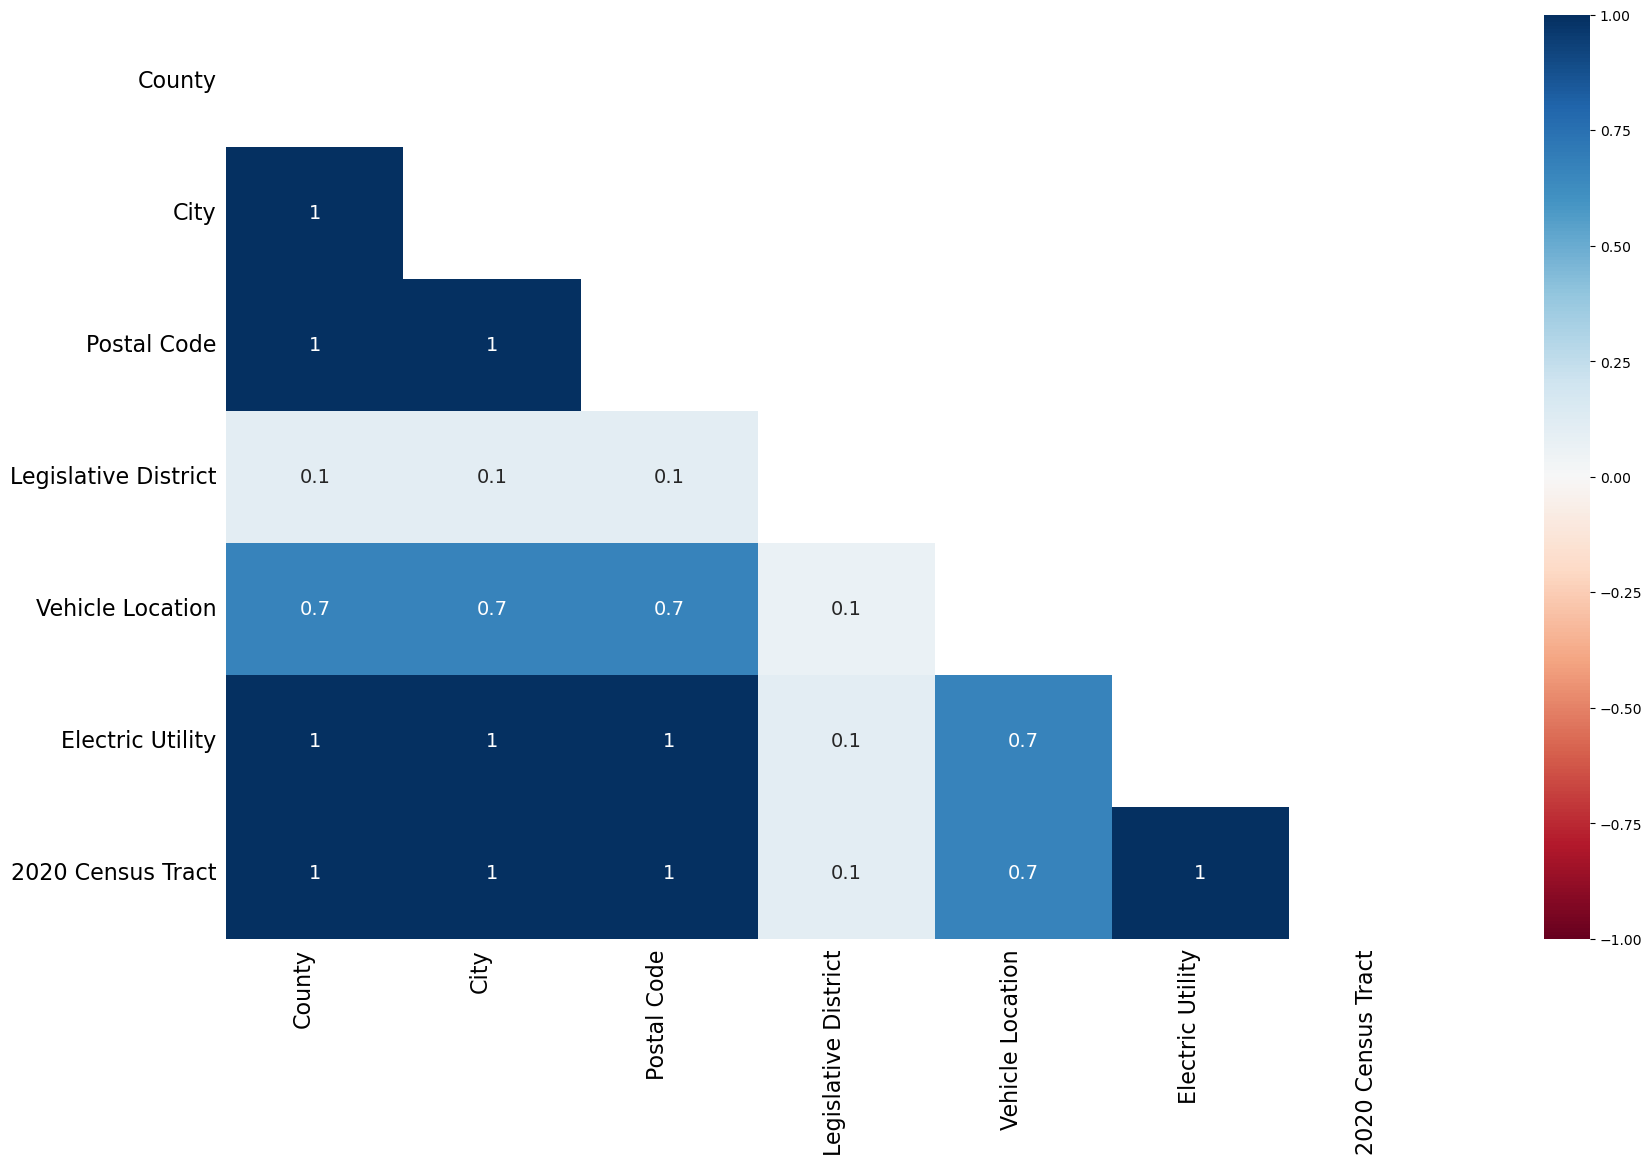

In [13]:
# get features that have missing values
missing_data = df.columns[df.isnull().any()]

# plotting heatmap of missing value
g = msno.heatmap(df[missing_data])
g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='right')

plt.show()

<p style='text-align: justify;'>Based on the heatmap above, it is known that there are several features that have a correlation with each other in the context of missing values such as City to County, Postal Code to City, Postal Code to County and others. This means, if one column has a missing value, then the other column will certainly have a missing value as well.</p>

<font size="4">Drop Values</font>

In [14]:
# drop the missing values on the subset County and City
df1 = df.dropna(subset=['County', 'City']).reset_index(drop=True)

# show missing values of data
df1.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 362
DOL Vehicle ID                                         0
Vehicle Location                                       5
Electric Utility                                       0
2020 Census Tract                                      0
dtype: int64

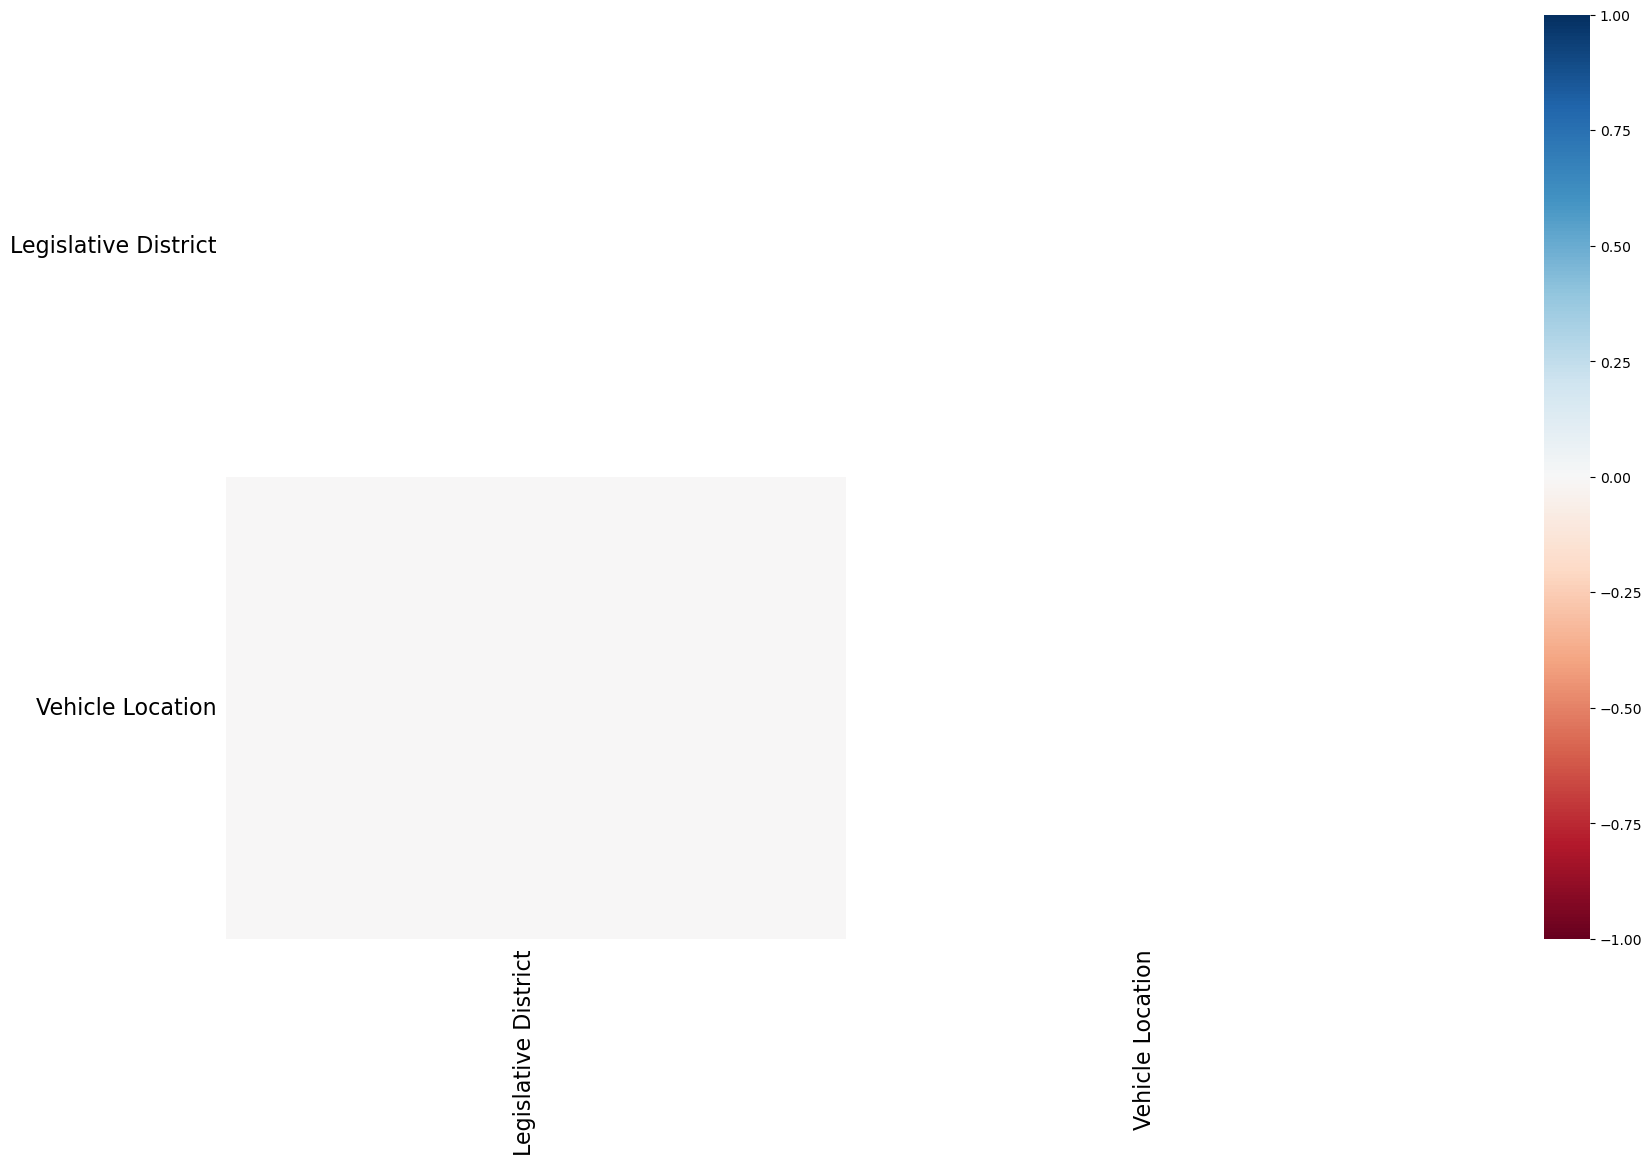

In [15]:
# get features that have missing values
missing_data = df1.columns[df1.isnull().any()]

# plotting heatmap of missing value
g = msno.heatmap(df1[missing_data])
g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='right')

plt.show()

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162999 entries, 0 to 162998
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         162999 non-null  object 
 1   County                                             162999 non-null  object 
 2   City                                               162999 non-null  object 
 3   State                                              162999 non-null  object 
 4   Postal Code                                        162999 non-null  float64
 5   Model Year                                         162999 non-null  int64  
 6   Make                                               162999 non-null  object 
 7   Model                                              162999 non-null  object 
 8   Electric Vehicle Type                              162999 non-null  object

<font size="4">Imputation</font>

In [17]:
# function for imputing numerical datatype column
def numerical_impute(data, columns, mode):
    for col in columns:
        if mode == 'median':
            value = data[col].median()
        elif mode == 'mean':
            value == data[col].mean()
        data[col].fillna(value, inplace = True)

# function for imputing categorical datatype column
def category_impute(data, columns):
    for col in columns:
        mode_value = data[col].mode().iloc[0]
        data[col].fillna(mode_value, inplace = True)
        
# call imputation
numerical_impute(df1, ['Legislative District'], 'median')
category_impute(df1 , ['Vehicle Location'])

# check for missing values after imputation 
df1.isnull().sum()          

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

<font size="4">Feature Selection</font>

In [18]:
# Update column value
df1['Electric Vehicle Type'] = df1['Electric Vehicle Type'].apply(lambda x: \
                                                                x.replace('Plug-in Hybrid Electric Vehicle (PHEV)', 'PHEV')
                                                                .replace('Battery Electric Vehicle (BEV)', 'BEV'))


# Rename column 'Clean Alternative Fuel Vehicle (CAFV) Eligibility' to 'Clean Alternative Fuel Vehicle Eligibility'
df1.rename(columns = {'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 'Clean Alternative Fuel Vehicle Eligibility'}, inplace = True)

# Extract longitude and latitude from 'Vehicle Location' column
def extract_coordinates(point_string):
    coordinates = point_string.replace('POINT', '').replace('(', '').replace(')','')
    longitude, latitude = coordinates.split()
    return float(longitude), float(latitude)
    
# Apply Extract function to create Two new columns - Longitude & Latitude from Vehicle location column
df1[['Longitude', 'Latitude']] = df1['Vehicle Location'].apply(extract_coordinates).apply(pd.Series)
df1 = df1.drop('Vehicle Location', axis = 1)

# Map States
def state_mapping(state_code):
    state_mapping = {
        'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
        'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
        'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho',
        'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
        'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
        'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
        'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
        'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
        'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
        'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
        'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
        'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
        'WI': 'Wisconsin', 'WY': 'Wyoming'
    }
    
    return state_mapping.get(state_code, 'Unknown')


# Apply state_mapping
df1['State'] = df1['State'].apply(state_mapping)

# Extract 1st sub string from a Electric Utility 
def extract_substring(data, column_name):
    data[column_name] = data[column_name].str.split('-|\\|').str[0].str.strip()
    
# apply the 'extract_substring' function to 'Electric Utility' column
extract_substring(df1, 'Electric Utility')

In [19]:
category1 = [i for i in df1.columns if df1[i].dtype == 'object']
category1

['VIN (1-10)',
 'County',
 'City',
 'State',
 'Make',
 'Model',
 'Electric Vehicle Type',
 'Clean Alternative Fuel Vehicle Eligibility',
 'Electric Utility']

<font size="4">Encoding</font>

In [20]:
for col in category1:
    print(df1[col].value_counts())

VIN (1-10)
7SAYGDEE6P    1025
7SAYGDEE7P    1019
7SAYGDEEXP    1011
7SAYGDEE8P     995
7SAYGDEE9P     978
              ... 
4JGDA6DB6H       1
KNDJP3AE7J       1
5YJSA1AC5D       1
WBY43FK06R       1
YV4H60CF5R       1
Name: count, Length: 10085, dtype: int64
County
King               84940
Snohomish          19012
Pierce             12575
Clark               9601
Thurston            5880
                   ...  
Rockdale               1
Fulton                 1
Collier                1
Charlottesville        1
Brevard                1
Name: count, Length: 186, dtype: int64
City
Seattle      27434
Bellevue      8187
Redmond       5886
Vancouver     5735
Bothell       5267
             ...  
Moorpark         1
Torrance         1
Kenn             1
Peyton           1
Lyman            1
Name: count, Length: 706, dtype: int64
State
Washington        162637
California            99
Virginia              40
Maryland              34
Texas                 22
Illinois              15
North Car

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import category_encoders as ce

# define a function to encode category data into numeric
def encode_data(data, columns, method):
    
    # one-hot encoding
    if method == 'ohe':
        encoded_columns = pd.get_dummies(data[columns], prefix = columns)
        data = pd.concat([data,encoded_columns], axis = 1)
        data.drop(columns, axis = 1, inplace = True)
        
    # ordinal encoding
    if method == 'ordinal':
        ordered_enc = OrdinalEncoder()
        encoded_columns = ordered_enc.fit_transform(data[columns])
        data[columns] = encoded_columns
        data[columns] = encoded_columns.astype(int)
    
    # Frequency encoding
    elif method == 'frequency':
        encoder = ce.CountEncoder(cols=columns)
        data = encoder.fit_transform(data)
    
    # for column in columns:
            #frequency_encoding = data[column].value_counts(normalize=True).to_dict()
            #data[column] = data[column].replace(frequency_encoding)
    
    return data

In [22]:
# define ordinal and frequency columns as list
ordinal_columns = ['State', 'Make', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle Eligibility']
frequency_columns = ['VIN (1-10)', 'County', 'City', 'Model', 'Electric Utility']

train1 = df1.copy()
train2 = df1.copy()

# apply the 'encode_data' function to 'ordinal_columns' and 'frequency_columns'
train1 = encode_data(train1, ordinal_columns, method='ordinal')
train1 = encode_data(train1, frequency_columns, method='frequency')

# apply the encode_data function 
train2 = encode_data(train2, category1, method = 'ohe')

In [23]:
train1

VIN (1-10)  County  City  State  Postal Code  Model Year  Make  Model  \
0               56    5880   865     40      98516.0        2020    33  31640   
1               56   84940  4756     40      98074.0        2019    27  13263   
2                3   84940  2522     40      98031.0        2016    33   5382   
3                1    5373   632     40      98370.0        2021    14    812   
4                5    5880  3955     40      98501.0        2023     1    651   
...            ...     ...   ...    ...          ...         ...   ...    ...   
162994         238    3966  2732     40      98225.0        2023    33  31640   
162995         927   84940   589     40      98070.0        2023    33  31640   
162996         968   19012  5267     40      98021.0        2023    33  31640   
162997          91   12575   363     40      98387.0        2017    35   2587   
162998          32    4171  2465     40      99203.0        2022    11   3016   

        Electric Vehicle Type  Clean Alternative Fuel Vehicle Eligibility  \
0                           0                                           0   
1                           0                                           0   
2                           0                                           0   
3                           1                                           0   
4                           1                                           2   
...                       ...                                         ...   
162994                      0                                           1   
162995                      0                                           1   
162996                      0                                           1   
162997                      1                                           2   
162998                      0                                           1   

        Electric Range  Base MSRP  Legislative District  DOL Vehicle ID  \
0                  291          0                  22.0       124535071   
1                  150          0                  45.0       102359449   
2                  200          0                  33.0       228682037   
3                   47          0                  23.0       171566447   
4                   23          0                  22.0       234923230   
...                ...        ...                   ...             ...   
162994               0          0                  40.0       236252152   
162995               0          0                  34.0       224470599   
162996               0          0                   1.0       244676939   
162997              25          0                   2.0       276466165   
162998               0          0                   6.0       197399828   

        Electric Utility  2020 Census Tract   Longitude   Latitude  
0                  96436       5.306701e+10 -122.747429  47.082112  
1                  96436       5.303303e+10 -122.031327  47.628578  
2                  96436       5.303303e+10 -122.201252  47.393181  
3                  96436       5.303509e+10 -122.641770  47.737525  
4                  96436       5.306701e+10 -122.896920  47.043535  
...                  ...                ...         ...        ...  
162994             96436       5.307300e+10 -122.486115  48.761615  
162995               236       5.303303e+10 -122.460490  47.448730  
162996             96436       5.306105e+10 -122.179458  47.802589  
162997             31621       5.305307e+10 -122.435115  47.104500  
162998              1019       5.306300e+10 -117.425265  47.635365  

[162999 rows x 18 columns]

In [24]:
train2

Postal Code  Model Year  Electric Range  Base MSRP  \
0           98516.0        2020             291          0   
1           98074.0        2019             150          0   
2           98031.0        2016             200          0   
3           98370.0        2021              47          0   
4           98501.0        2023              23          0   
...             ...         ...             ...        ...   
162994      98225.0        2023               0          0   
162995      98070.0        2023               0          0   
162996      98021.0        2023               0          0   
162997      98387.0        2017              25          0   
162998      99203.0        2022               0          0   

        Legislative District  DOL Vehicle ID  2020 Census Tract   Longitude  \
0                       22.0       124535071       5.306701e+10 -122.747429   
1                       45.0       102359449       5.303303e+10 -122.031327   
2                       33.0       228682037       5.303303e+10 -122.201252   
3                       23.0       171566447       5.303509e+10 -122.641770   
4                       22.0       234923230       5.306701e+10 -122.896920   
...                      ...             ...                ...         ...   
162994                  40.0       236252152       5.307300e+10 -122.486115   
162995                  34.0       224470599       5.303303e+10 -122.460490   
162996                   1.0       244676939       5.306105e+10 -122.179458   
162997                   2.0       276466165       5.305307e+10 -122.435115   
162998                   6.0       197399828       5.306300e+10 -117.425265   

         Latitude  VIN (1-10)_1C4JJXN60P  ...  \
0       47.082112                  False  ...   
1       47.628578                  False  ...   
2       47.393181                  False  ...   
3       47.737525                  False  ...   
4       47.043535                  False  ...   
...           ...                    ...  ...   
162994  48.761615                  False  ...   
162995  47.448730                  False  ...   
162996  47.802589                  False  ...   
162997  47.104500                  False  ...   
162998  47.635365                  False  ...   

        Electric Utility_OKANOGAN COUNTY ELEC COOP, INC  \
0                                                 False   
1                                                 False   
2                                                 False   
3                                                 False   
4                                                 False   
...                                                 ...   
162994                                            False   
162995                                            False   
162996                                            False   
162997                                            False   
162998                                            False   

        Electric Utility_PACIFICORP  \
0                             False   
1                             False   
2                             False   
3                             False   
4                             False   
...                             ...   
162994                        False   
162995                        False   
162996                        False   
162997                        False   
162998                        False   

        Electric Utility_PORTLAND GENERAL ELECTRIC CO  \
0                                               False   
1                                               False   
2                                               False   
3                                               False   
4                                               False   
...                                               ...   
162994                                          False   
162995                                          False   
162996                            

In [25]:
train1.shape

(162999, 18)

In [26]:
df1.shape

(162999, 18)

# Exploratory Data Analysis

In [27]:
df1.head(5)

VIN (1-10)    County       City       State  Postal Code  Model Year  \
0  5YJYGDEF5L  Thurston      Lacey  Washington      98516.0        2020   
1  1N4BZ1CP1K      King  Sammamish  Washington      98074.0        2019   
2  5YJXCDE28G      King       Kent  Washington      98031.0        2016   
3  JHMZC5F37M    Kitsap    Poulsbo  Washington      98370.0        2021   
4  WA1F2AFY4P  Thurston    Olympia  Washington      98501.0        2023   

     Make    Model Electric Vehicle Type  \
0   TESLA  MODEL Y                   BEV   
1  NISSAN     LEAF                   BEV   
2   TESLA  MODEL X                   BEV   
3   HONDA  CLARITY                  PHEV   
4    AUDI     Q5 E                  PHEV   

  Clean Alternative Fuel Vehicle Eligibility  Electric Range  Base MSRP  \
0    Clean Alternative Fuel Vehicle Eligible             291          0   
1    Clean Alternative Fuel Vehicle Eligible             150          0   
2    Clean Alternative Fuel Vehicle Eligible             200          0   
3    Clean Alternative Fuel Vehicle Eligible              47          0   
4      Not eligible due to low battery range              23          0   

   Legislative District  DOL Vehicle ID        Electric Utility  \
0                  22.0       124535071  PUGET SOUND ENERGY INC   
1                  45.0       102359449  PUGET SOUND ENERGY INC   
2                  33.0       228682037  PUGET SOUND ENERGY INC   
3                  23.0       171566447  PUGET SOUND ENERGY INC   
4                  22.0       234923230  PUGET SOUND ENERGY INC   

   2020 Census Tract   Longitude   Latitude  
0       5.306701e+10 -122.747429  47.082112  
1       5.303303e+10 -122.031327  47.628578  
2       5.303303e+10 -122.201252  47.393181  
3       5.303509e+10 -122.641770  47.737525  
4       5.306701e+10 -122.896920  47.043535

<font size="4">Univariate Analysis</font>

In [28]:
# parameter description
"""
Parameters:
    data (DataFrame): The input data.
    column (str): The variable to be plotted on the x-axis (or y-axis, based on the `orient` parameter).
    hue (str): The third variable to differentiate categories (optional).
    label (str): The label for the variable on the x-axis (or y-axis).
    max_sample (int): The maximum number of categories to be shown on the plot.
    num_x_ticks (int): The number of x-axis ticks to be customized.
    x_ticks (list): The list of x-axis tick labels to be customized.
    width (float): The width of the plot.
    height (float): The height of the plot.
    y_title (float): The distance between the title and the plot.
    orient (str): The orientation of the plot ('vertical' or 'horizontal').
    title (str): The title of the plot.
"""

# define a procedure to plot countplot for univariate analysis
def countplot_univariate(data, column, hue, label, max_sample, num_x_ticks, x_ticks, width, height, y_title, orient, title):
    
    # create a new figure with the specified width, height and title
    plt.figure(figsize=(width, height))
    plt.suptitle(f'{title}', y=y_title)

    # determine the order of the categories based on the maximum sample size
    order = data[column].value_counts().nlargest(max_sample).index if max_sample > 0 else data[column].value_counts().index

    # create a countplot based on the specified orientation
    if orient == 'vertical':
        g = sns.countplot(x=column, hue=hue, order=order, data=data, palette='muted')
        g.set(xlabel=label, ylabel='Number')
    elif orient == 'horizontal':
        g = sns.countplot(y=column, hue=hue, order=order, data=data, palette='muted')
        g.set(xlabel='Number', ylabel=label)

    plt.legend(title='Target', labels=['BEV', 'PHEV'], fontsize=11)

    # customize the x-axis ticks if the number of ticks is specified
    if num_x_ticks > 0:
        x_ticks_list = list(range(num_x_ticks))
        plt.xticks(x_ticks_list, x_ticks, fontsize=11)

    # calculate the total number of observations
    total = len(data[column])

    # add percentage annotations to the bars
    for p in g.patches:
        if orient == 'vertical':
            height = p.get_height()
            percentage = (height / total) * 100
            g.annotate(f'{percentage:.1f}%', (p.get_x() + (p.get_width() + 0.05) / 2, height + 1000), \
                            ha='center', va='bottom', fontsize=12)
        elif orient == 'horizontal':
            width = p.get_width()
            percentage = (width / total) * 100
            g.annotate(f'{percentage:.1f}%', (width + 250, p.get_y() + p.get_height() / 2), \
                       ha='left', va='center', fontsize=11)
            
    plt.show()

In [29]:
# define a function to change low-frequency category values into "Others"
def change_to_others(data, column_name, percent):
    
    data = data.copy()
    
    # calculate the value counts of the column as proportions, 
    value_counts = data[column_name].value_counts(normalize=True)
    
    # identify values with frequencies below the specified percentage threshold,
    low_frequency_values = value_counts[value_counts < percent].index
    
    # replace low-frequency values with "Others"
    data[column_name] = np.where(data[column_name].isin(low_frequency_values), "Others", data[column_name])

    return data

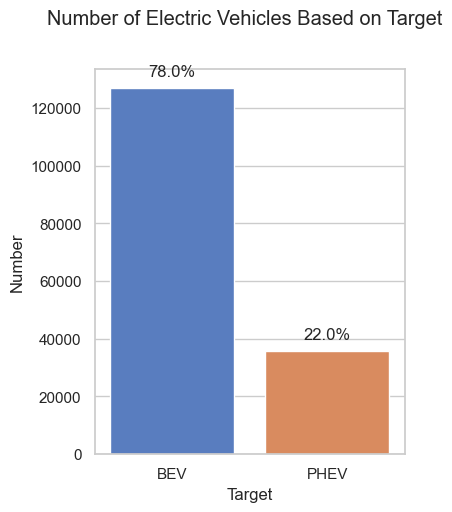

In [30]:
sns.set_theme(style="whitegrid")

chart = 'Number of Electric Vehicles Based on Target'

plt.figure(figsize=(4,5))
plt.suptitle(f'{chart}', y=1)

# plotting countplot for the number of electric vehicles based on the target variable
g = sns.countplot(x='Electric Vehicle Type', data=df1, palette='muted')
g.set(ylabel='Number', xlabel='Target')

# customize xticks
plt.xticks([0, 1], ['BEV', 'PHEV'], fontsize=11)

# annotate the percentage on the chart
total = len(df1['Electric Vehicle Type'])
for p in g.patches:
            height = p.get_height()
            percentage = (height / total) * 100
            g.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, height + 3000), \
                            ha='center', va='bottom', fontsize=12)

plt.show()

<p style='text-align: justify;'>The graph above shows the distribution of the target variable, it is known that the number of PHEV electric vehicles is 22.0% of the total number of electric vehicles. It is concluded that there is an imbalance in the data on the target variable.

**Information**:<br>
**BEV**: Battery Electric Vehicle<br>
**PHEV**: Plug-in Hybrid Electric Vehicle</p>

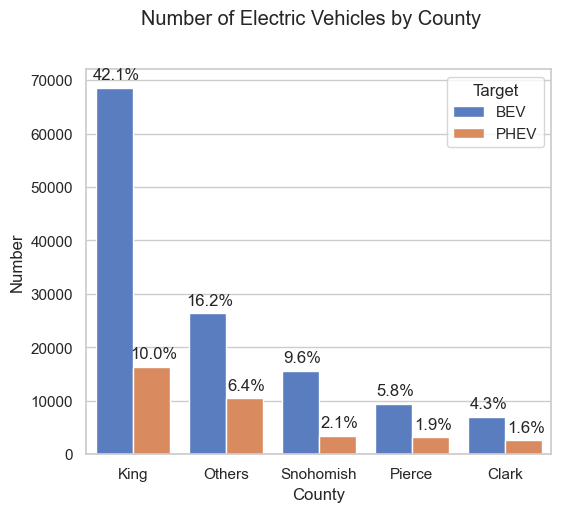

In [31]:
df2 = change_to_others(df1, 'County', 0.05)

# initialize chart title
chart = 'Number of Electric Vehicles by County'

# apply the procedure to plot the chart
countplot_univariate(df2, 'County', 'Electric Vehicle Type', 'County', 0, 0, None, 6, 5, 1, \
                     'vertical', chart)

<p style='text-align: justify;'>The graph above shows the distribution of the target variable by 'County'. The King area is the area with the highest number of electric vehicles with a percentage of 42.1% for BEV and 10.0% for PHEV.

**Information**:<br>
**BEV**: Battery Electric Vehicle<br>
**PHEV**: Plug-in Hybrid Electric Vehicle</p>

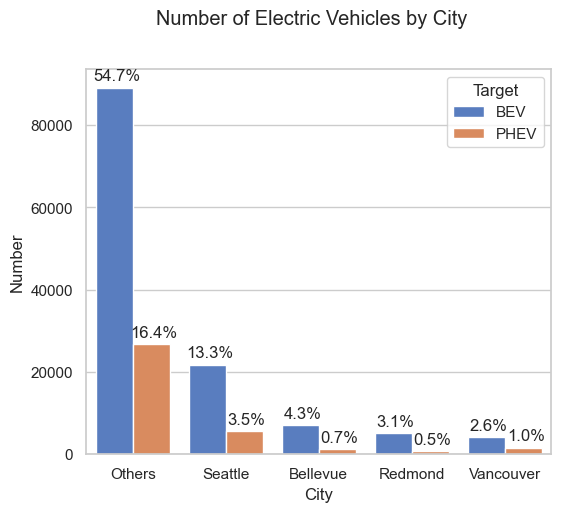

In [32]:
df2 = change_to_others(df1, 'City', 0.035)

# initialize chart title
chart = 'Number of Electric Vehicles by City'

# apply the procedure to plot the chart
countplot_univariate(df2, 'City', 'Electric Vehicle Type', 'City', 0, 0, None, 6, 5, 1, \
                     'vertical', chart)

<p style='text-align: justify;'>The graph above shows the distribution of target variables by 'City'. Seattle is the city with the second highest number of electric vehicles at 13.3% for BEV and 3.5% for PHEV. The rest of the cities fall into the category of cities with the highest number of electric vehicles at 54.7% for BEV and 16.4% for PHEV.

**Information**:<br>
**BEV**: Battery Electric Vehicle<br>
**PHEV**: Plug-in Hybrid Electric Vehicle</p>

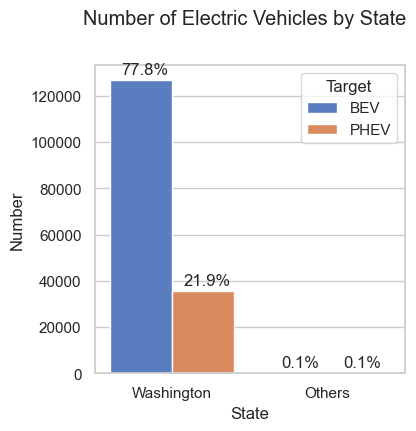

In [33]:
df2 = change_to_others(df1, 'State', 0.01)

# initialize chart title
chart = 'Number of Electric Vehicles by State'

# apply the procedure to plot the chart
countplot_univariate(df2, 'State', 'Electric Vehicle Type', 'State', 0, 0, None, 4, 4, 1.02, \
                     'vertical', chart)

<p style='text-align: justify;'>The graph above shows the distribution of target variables by 'State'. Washington is the state with the highest number of electric vehicles with a total percentage of 99.7% (BEV and PHEV).

**Information**:<br>
**BEV**: Battery Electric Vehicle<br>
**PHEV**: Plug-in Hybrid Electric Vehicle</p>

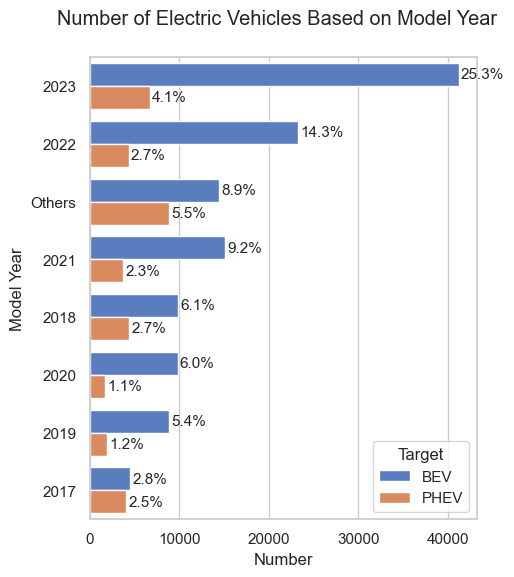

In [34]:
df2 = change_to_others(df1, 'Model Year', 0.036)

# initialize chart title
chart = 'Number of Electric Vehicles Based on Model Year'

# apply the procedure to plot the chart
countplot_univariate(df2, 'Model Year', 'Electric Vehicle Type', 'Model Year', 0, 0, None, 5, 6, 0.96, \
                     'horizontal', chart)

<p style='text-align: justify;'>The graph above shows the distribution of target variables by 'Model Year'. Electric vehicles with a model year of 2023 make up the largest percentage with 25.3% for BEVs and 4.1% for PHEVs. This is followed by 2022, others, 2021, 2018, 2020, 2019, and, 2017.

**Information**:<br>
**BEV**: Battery Electric Vehicle<br>
**PHEV**: Plug-in Hybrid Electric Vehicle</p>

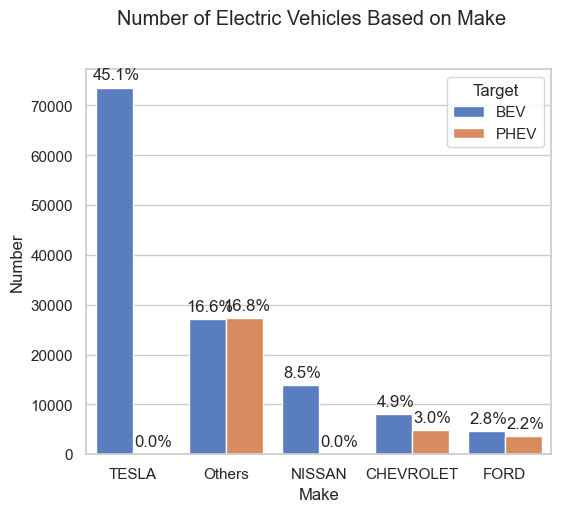

In [35]:
df2 = change_to_others(df1, 'Make', 0.05)

# initialize chart title
chart = 'Number of Electric Vehicles Based on Make'

# apply the procedure to plot the chart
countplot_univariate(df2, 'Make', 'Electric Vehicle Type', 'Make', 0, 0, None, 6, 5, 1, \
                     'vertical', chart)

<p style='text-align: justify;'>The graph above shows the distribution of target variables by 'Make'. Electric vehicles made by Tesla are most prevalent at 45.1% (BEV and PHEV), followed by other brands at 16.8% (BEV and PHEV), NISSAN at 8.5% (BEV and PHEV), CHEVROLET at 4.9% and 3%(BEV and PHEV) and FORD 2.8% and 2.2%(BEV and PHEV).

**Information**:<br>
**BEV**: Battery Electric Vehicle<br>
**PHEV**: Plug-in Hybrid Electric Vehicle</p>

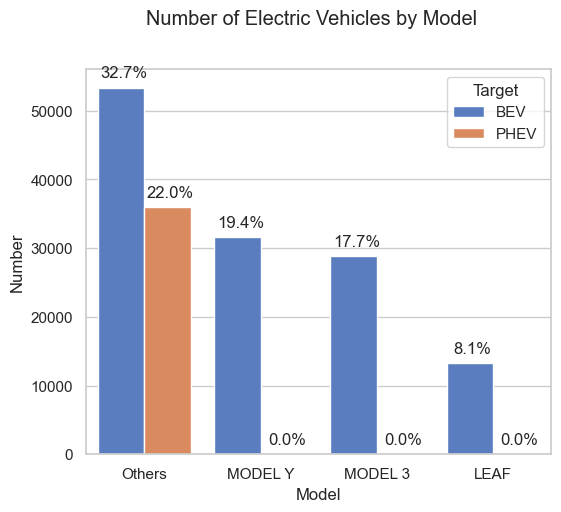

In [36]:
df2 = change_to_others(df1, 'Model', 0.05)

# initialize chart title
chart = 'Number of Electric Vehicles by Model'

# apply the procedure to plot the chart
countplot_univariate(df2, 'Model', 'Electric Vehicle Type', 'Model', 0, 0, None, 6, 5, 1, \
                     'vertical', chart)

<p style='text-align: justify;'>The graph above shows the distribution of target variables by 'Model'. Electric vehicles with miscellaneous models are the most prevalent with a percentage of 32.7% (BEV and PHEV), followed by MODEL Y, MODEL 3, and, LEAF.

**Information**:<br>
**BEV**: Battery Electric Vehicle<br>
**PHEV**: Plug-in Hybrid Electric Vehicle</p>

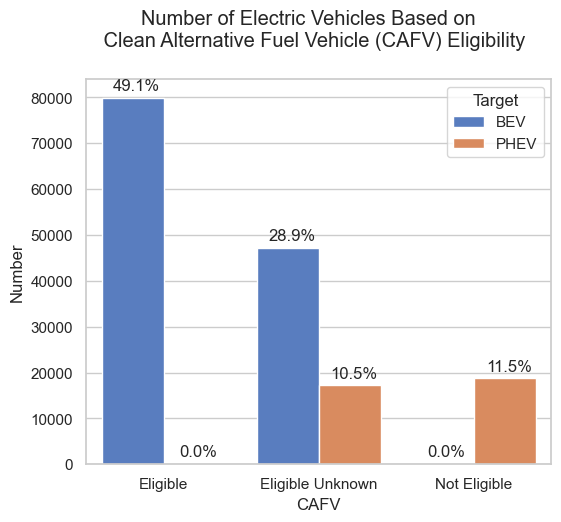

In [37]:
chart = 'Number of Electric Vehicles Based on \n Clean Alternative Fuel Vehicle (CAFV) Eligibility'

# apply the procedure to plot the chart
countplot_univariate(df1, 'Clean Alternative Fuel Vehicle Eligibility', 'Electric Vehicle Type', 'CAFV', \
                     0, 3, ['Eligible', 'Eligible Unknown', 'Not Eligible'], 6, 5, 1.02, 'vertical', chart)

<p style='text-align: justify;'>The graph above shows the distribution of target variables by 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'. Most electric vehicles meet the clean fuel vehicle (low emission) eligibility requirements at 41.9% (BEV and PHEV), followed by electric vehicles with unknown eligibility status at 39.4% (BEV and PHEV), and electric vehicles with ineligible status at 11.5% (BEV and PHEV).

**Information**:<br>
**BEV**: Battery Electric Vehicle<br>
**PHEV**: Plug-in Hybrid Electric Vehicle

**Clean Alternative Fuel Vehicle Eligibility** refers to the criteria or requirements that determine whether a vehicle is eligible to be classified as a Clean Alternative Fuel Vehicle (CAFV). CAFVs are vehicles that utilize alternative fuels or advanced technologies, such as electric vehicles, hybrid vehicles, hydrogen fuel cell vehicles, natural gas vehicles, or propane vehicles. These vehicles are considered more environmentally friendly and have reduced emissions compared to traditional gasoline or diesel vehicles.</p>

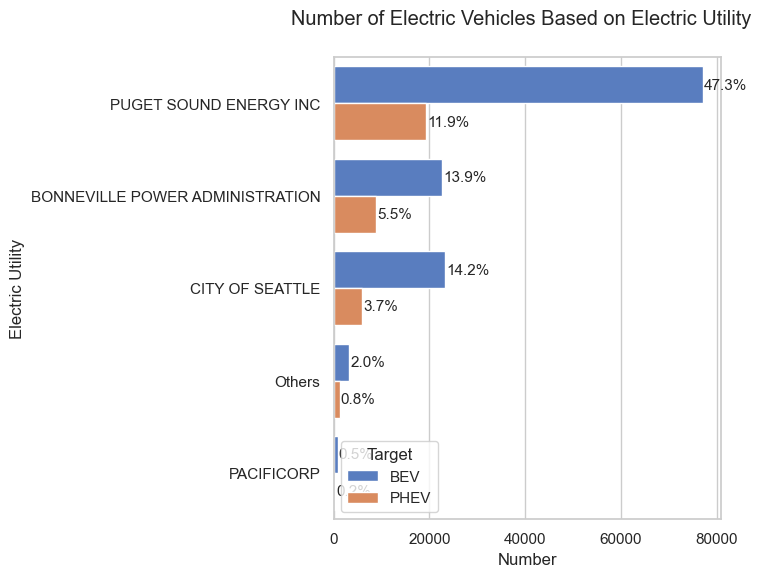

In [38]:
df2 = change_to_others(df1, 'Electric Utility', 0.007)

# initialize chart title
chart = 'Number of Electric Vehicles Based on Electric Utility'

# apply the procedure to plot the chart
countplot_univariate(df2, 'Electric Utility', 'Electric Vehicle Type', 'Electric Utility', 0, 0, None, 5, 6, 0.96, \
                     'horizontal', chart)

<p style='text-align: justify;'>The graph above shows the distribution of target variables by 'Electric Utility'. Electric vehicles with Puget Sound Energy electric utility are the most numerous at 59.2% (BEVs and PHEVs), followed by Bonneville Power Administration, City of Seattle, other, and Pacificorp.

**Information**:<br>
**BEV**: Battery Electric Vehicle<br>
**PHEV**: Plug-in Hybrid Electric Vehicle</p>

<font size="4">Bivariate Analysis</font>

In [39]:
# parameter description
"""
Parameters:
    data (DataFrame): The input data.
    x (str): The variable to be plotted on the x-axis.
    y (str): The variable to be plotted on the y-axis.
    hue (str): The variable used for grouping and distinguishing categories.
    label (str): The label for the y-axis.
    label2 (str): The label for the x-axis.
    width (float): The width of the chart.
    height (float): The height of the chart.
    y_title (float): The vertical position of the chart title.
    orient (str): The orientation of the chart ('vertical' or 'horizontal').
    title (str): The title of the chart.
        
"""

# define a procedure to plot boxplot for bivariate analysis
def boxplot_bivariate(data, x, y, hue, label, label2, width, height, y_title, orient, title):

    # set width, height, and title of the chart
    plt.figure(figsize=(width, height))
    plt.suptitle(f'{title}', y=y_title)

    # copy data for distribution processing and mapping the values
    df_biv = data.copy()
    df_biv[x] = df_biv[x].apply(lambda x: 'Eligible' if x == 'Clean Alternative Fuel Vehicle Eligible' \
                                else ('Unknown' if x == 'Eligibility unknown as battery range has not been researched' \
                                else 'Not Eligible'))

    # branching based on the orient parameter for plotting the chart vertically or horizontally
    if orient == 'vertical':
        g = sns.boxplot(x=x, y=y, hue=hue, showmeans=True, palette='muted', data=df_biv)
        g.set(xlabel=label2, ylabel=label)
    elif orient == 'horizontal':
        g = sns.boxplot(x=y, y=x, hue=hue, showmeans=True, palette='muted', data=df_biv)
        g.set(xlabel=label2, ylabel=label)

    plt.show()

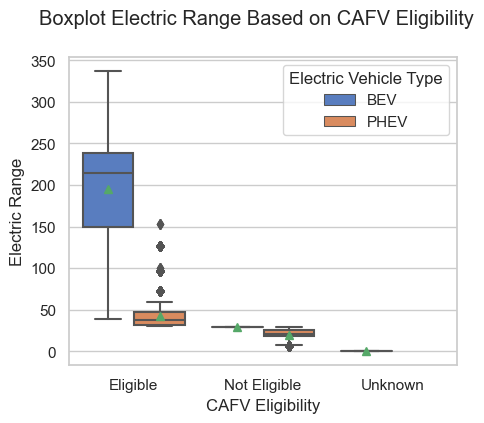

In [40]:
# initialize chart title
chart = 'Boxplot Electric Range Based on CAFV Eligibility'

# apply the procedure to plot the chart
boxplot_bivariate(df1, 'Clean Alternative Fuel Vehicle Eligibility', 'Electric Range', \
                  'Electric Vehicle Type', 'Electric Range', 'CAFV Eligibility', 5, 4, 1, 'vertical', chart)

<p style='text-align: justify;'>The distribution of the 'Electric Range' of BEV electric vehicles that are eligible under the clean fuel vehicle eligibility requirements is in the area of about 150 to 250.

**BEV**: Battery Electric Vehicle<br>
**PHEV**: Plug-in Hybrid Electric Vehicle</p>

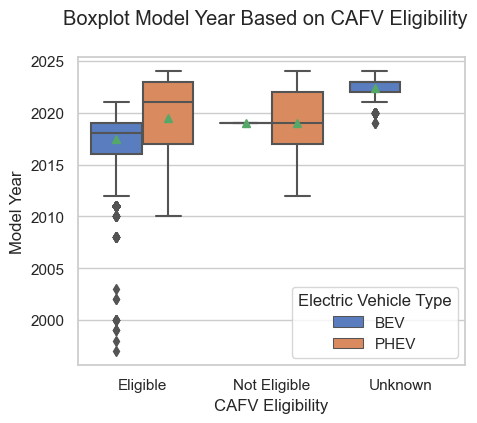

In [41]:
# initialize chart title
chart = 'Boxplot Model Year Based on CAFV Eligibility'

# apply the procedure to plot the chart
boxplot_bivariate(df1, 'Clean Alternative Fuel Vehicle Eligibility', 'Model Year', \
                  'Electric Vehicle Type', 'Model Year', 'CAFV Eligibility', 5, 4, 1, 'vertical', chart)

<p style='text-align: justify;'>Electric vehicle model years are in the 2010 to 2023 distribution area.

**BEV**: Battery Electric Vehicle<br>
**PHEV**: Plug-in Hybrid Electric Vehicle</p>

<font size="4">Correlation</font>

Text(0.5, 1.0, 'Triangle Electric Vehicle Correlation Heatmap')

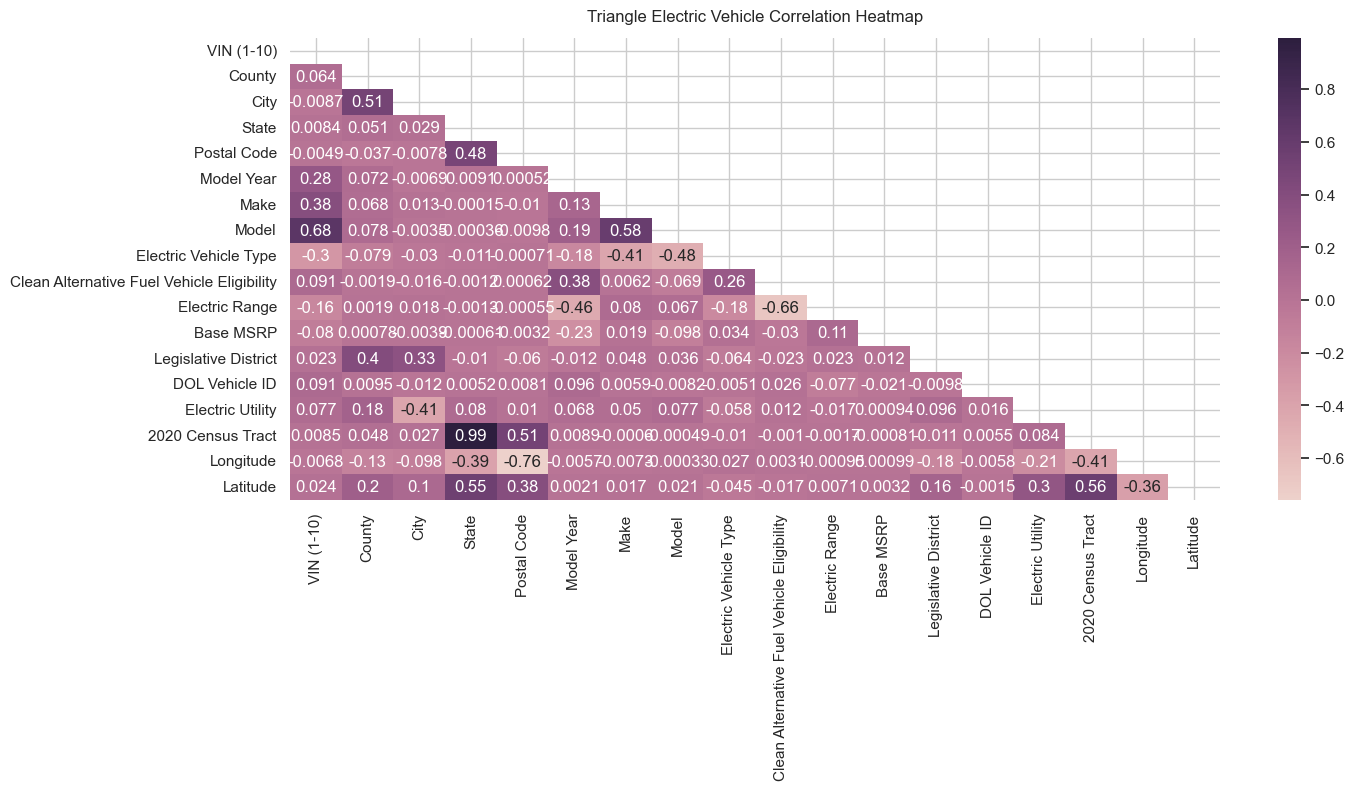

In [42]:
plt.figure(figsize=(15, 6))
mask = np.triu(np.ones_like(train1.corr()))
heatmap=sns.heatmap(train1.corr(),cmap=sns.cubehelix_palette(as_cmap=True), annot=True,  \
                    fmt = '.2g', cbar = True,  mask = mask)
heatmap.set_title('Triangle Electric Vehicle Correlation Heatmap',  fontdict={'fontsize':12}, pad=12)

<p style='text-align: justify;'>The graph above shows that there are not many features that are strongly correlated linearly with the target. This means that most of the correlations contained in the dataset are non-linear. Based on this, the appropriate model to use is a model that has good performance on datasets that have many non-linear correlations such as Decision Trees, Random Forests, Gradient Boosting, Neural Networks, and Support Vector Machines (SVM).</p>

C:\Users\mansi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


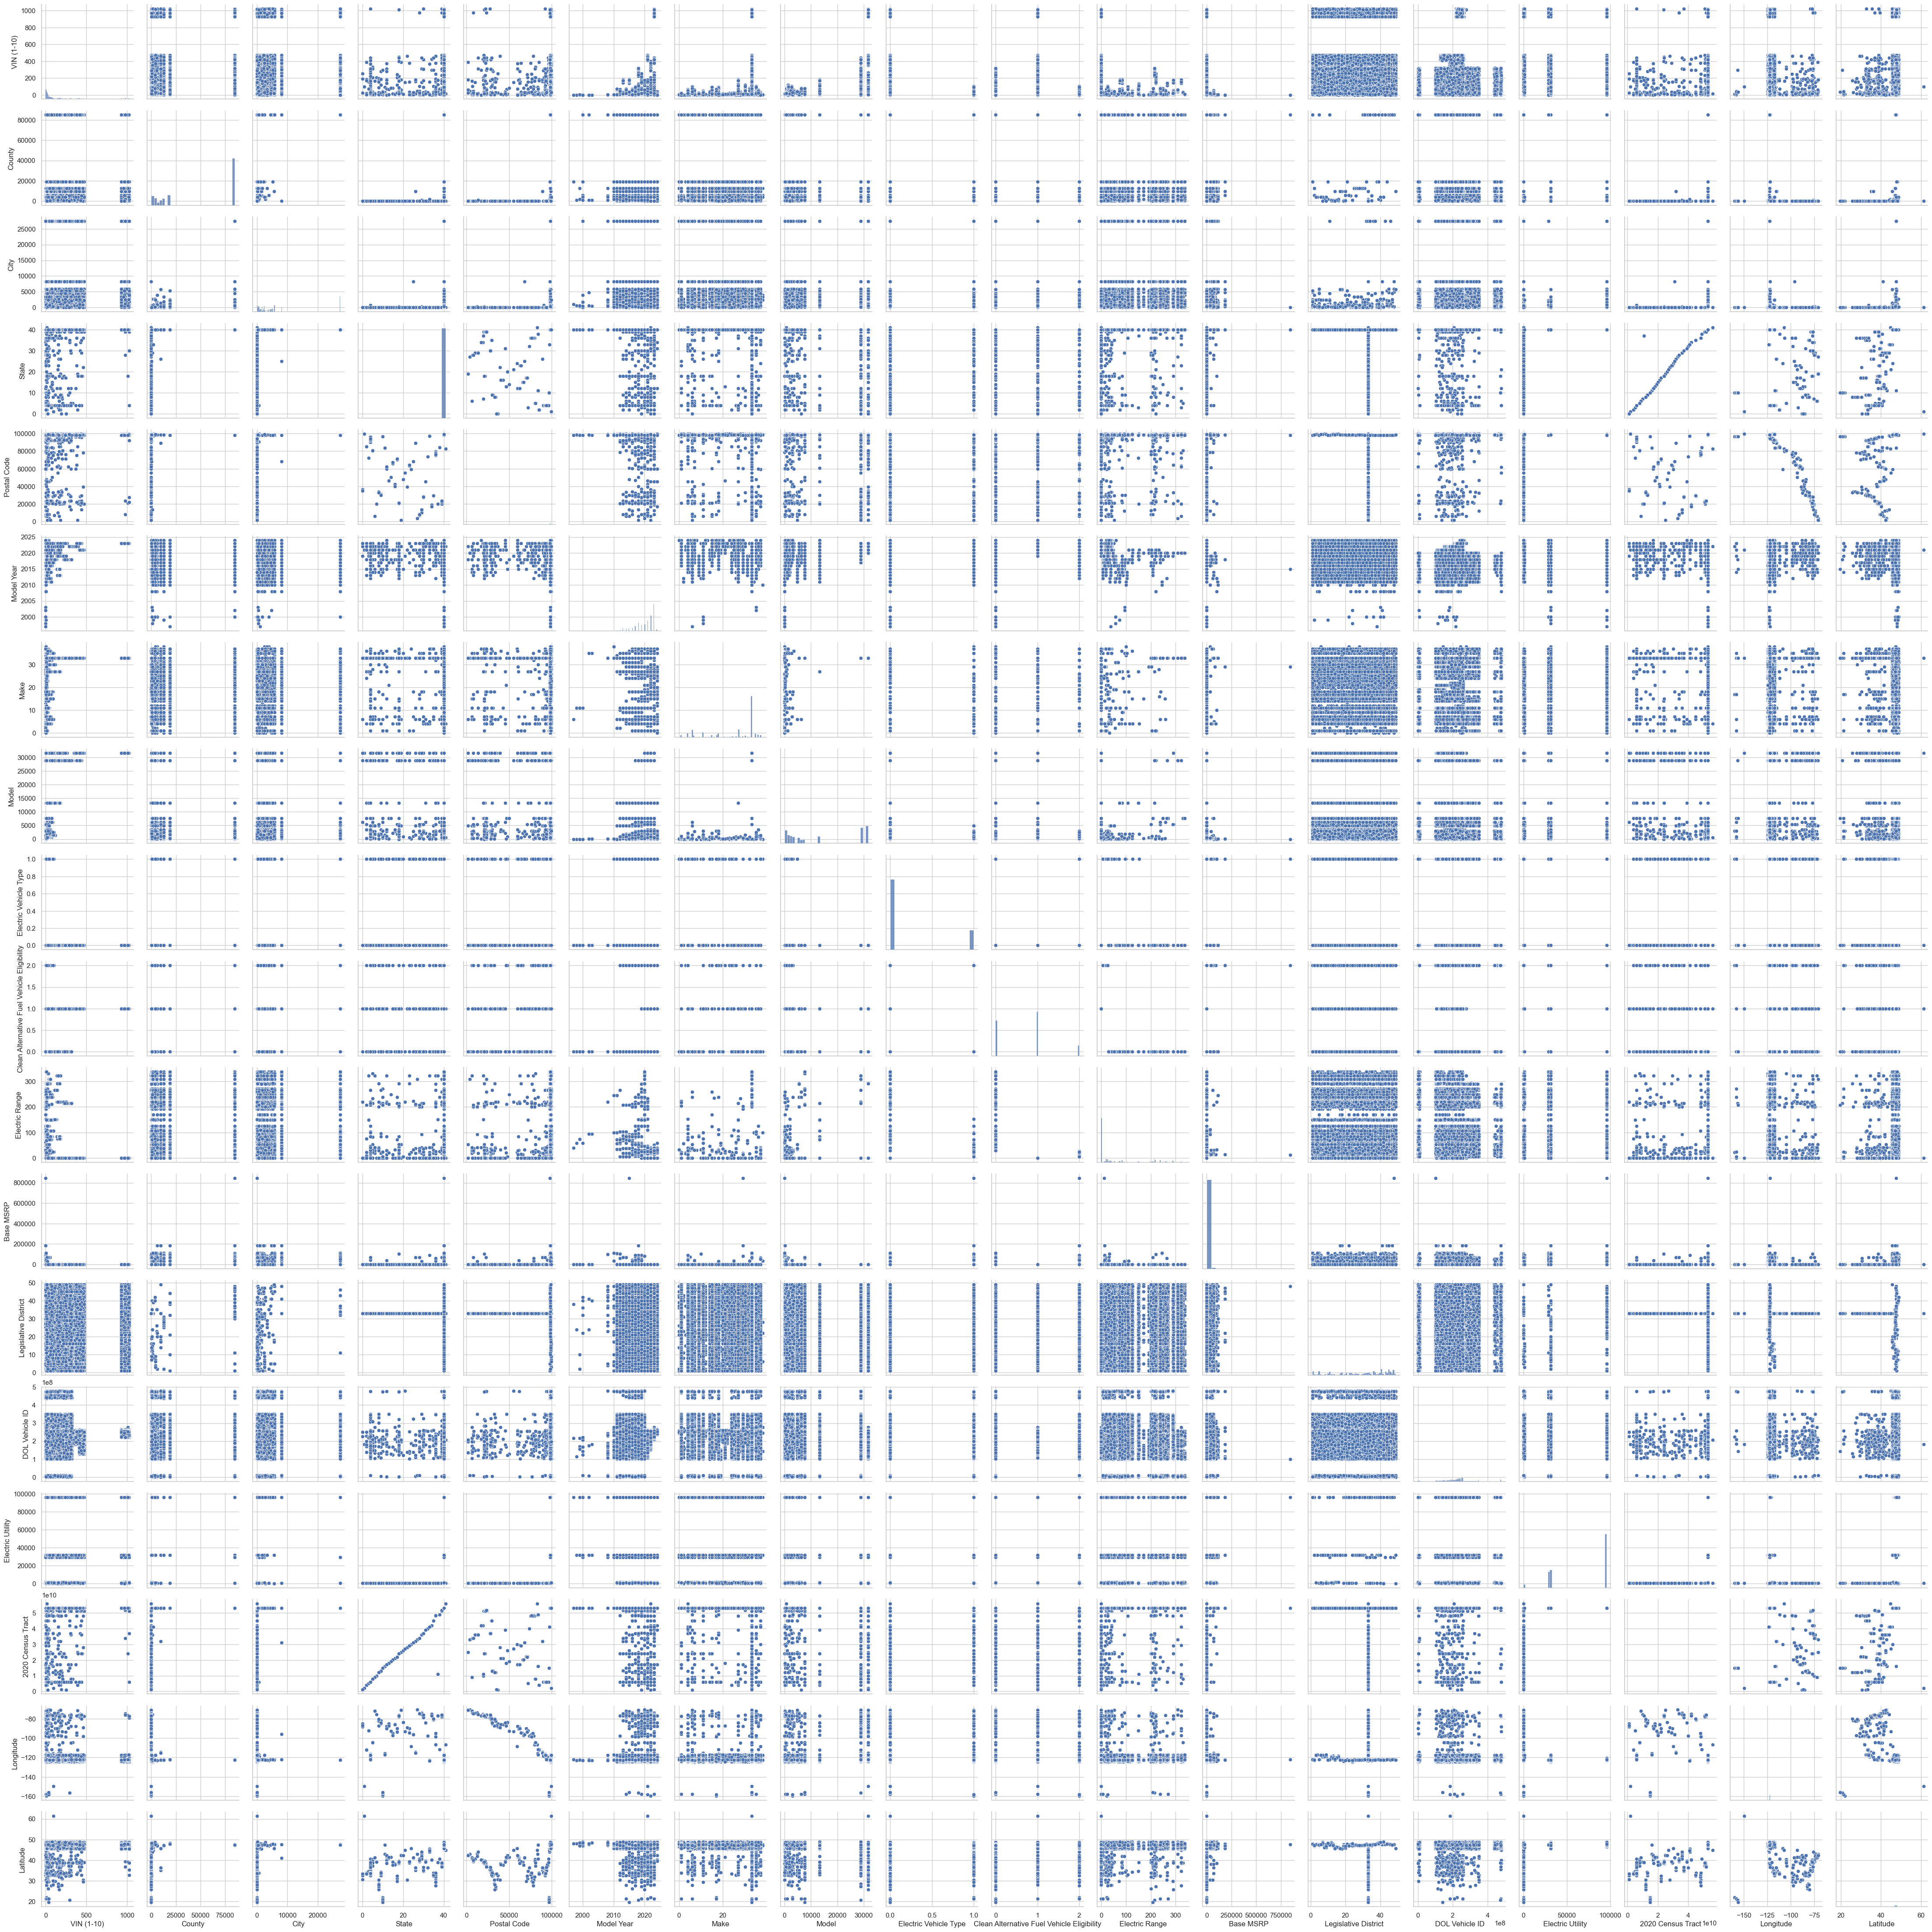

In [43]:
# plot a pairplot for all features
sns.pairplot(train1)
plt.show()

C:\Users\mansi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


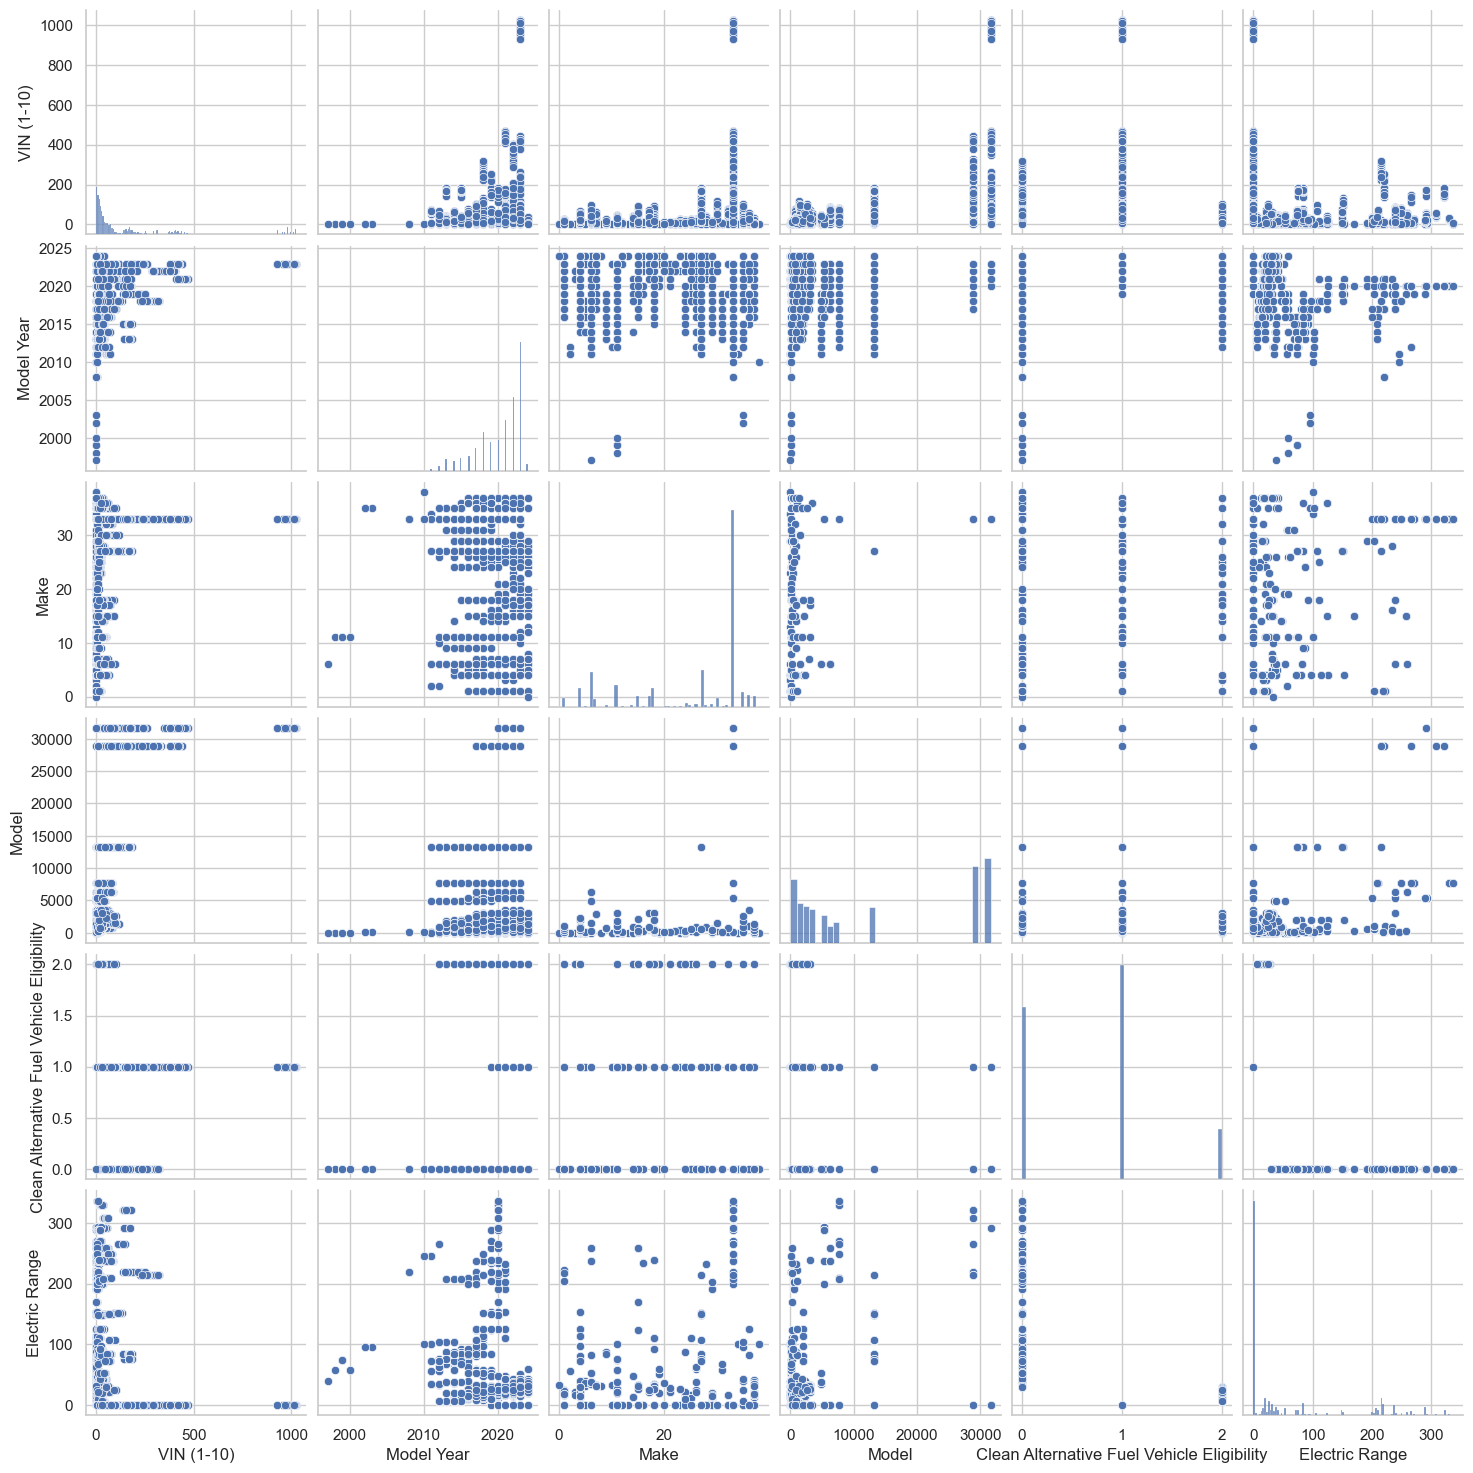

In [44]:
# plot a pairplot for all features
sns.pairplot(train1, vars=['VIN (1-10)', 'Model Year', 'Make', 'Model', 
                          'Clean Alternative Fuel Vehicle Eligibility', 'Electric Range'])
plt.show()

<p style='text-align: justify;'>The graph above justifies that there are not many features that have a strong linear correlation between features.</p>

# Modeling

In [45]:
def plot_cm(cm, chart):

    # set figure size and title
    plt.figure(figsize=(6, 5))
    plt.suptitle(f'Confusion Matrix of {chart}', y=1)

    # initialize TP, TN, FN, and FP counts
    group_names = ['True Negative', 'False Negative', 'False Positive', 'True Positive']
    group_initial = ['(TN)','(FN)','(FP)','(TP)']
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

    # create label strings with counts and percentages
    labels = [f"{v1}\n{v2}\n\n{v3}" for v1, v2, v3 in zip(group_names, group_initial, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    # plot heatmap of the confusion matrix
    g = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    g.set_xlabel('Actual')
    g.set_ylabel('Predicted')
    
    plt.show()

<font size="4">Split Dataset</font>

In [104]:
from sklearn.model_selection import train_test_split
sns.set_theme(style="white")

# initialize X as features and y as target
X = train1.drop('Electric Vehicle Type', axis=1).values
y = train1['Electric Vehicle Type'].values

# split the data into train and test sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=21)

<font size="4">Resampling</font>

In [105]:
# count the occurrences of target value in the 'Electric Vehicle Type' column
train1['Electric Vehicle Type'].value_counts()

Electric Vehicle Type
0    127098
1     35901
Name: count, dtype: int64

<p style='text-align: justify;'>The number of target classes indicates an imbalanced condition. This needs to be avoided so that the model does not cause bias. To overcome this, it is necessary to do sampling so that the number of target classes approaches a balanced condition.</p>

In [106]:
# initialize a NearMiss for undersampling
ns = NearMiss()

# perform undersampling using NearMiss and obtain the resampled dataset
print("Original dataset shape:", Counter(y_train))
X_train_resampled, y_train_resampled = ns.fit_resample(X_train, y_train)
print("Resample dataset shape:", Counter(y_train_resampled))

Original dataset shape: Counter({0: 88968, 1: 25131})
Resample dataset shape: Counter({0: 25131, 1: 25131})


## Navie Bayes

In [107]:
# initialize the Naive Bayes classifier and fit it to the resampled training data
NB_classifier = GaussianNB()
NB_classifier.fit(X_train_resampled, y_train_resampled)

# make predictions on the test data
y_pred = NB_classifier.predict(X_test)

# calculate metric evaluation and confusion matrix
accurary = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print the result
print("="*55)
print("Accuracy     :", accurary)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)

print("Confusion Matrix:\n\n", cm)
print("="*55)

Accuracy     : 0.7328220858895705
ROC AUC Score: 0.519374234312026
Classification Report:

               precision    recall  f1-score   support

           0       0.79      0.90      0.84     38130
           1       0.28      0.14      0.19     10770

    accuracy                           0.73     48900
   macro avg       0.53      0.52      0.51     48900
weighted avg       0.68      0.73      0.70     48900

Confusion Matrix:

 [[34350  3780]
 [ 9285  1485]]


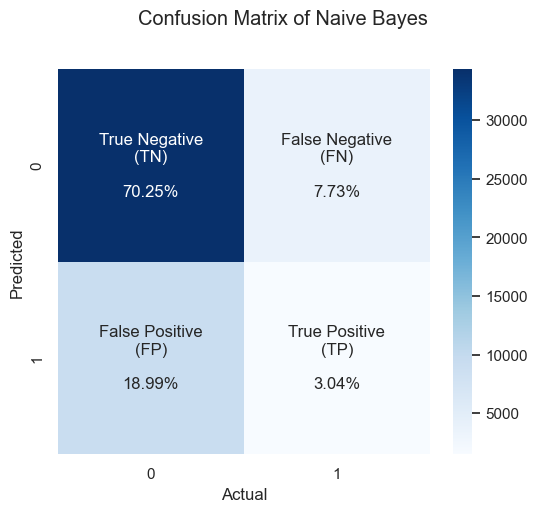

In [108]:
chart = 'Naive Bayes'

# plot the confusion matrix
plot_cm(cm, chart)

**Class 0**: BEV (Battery Electric Vehicle)<br>
**Class 1**: PHEV (Plug-in Hybrid Electric Vehicle)

<font size="4">Cross Validation</font>

In [111]:
# initialize a K-Fold cross-validation object with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# compute the cross-validation accuracy scores and ROC AUC scores for the untuned NB classifier
nb_before_tuned_cv_acc_scores = cross_val_score(NB_classifier, X_train_resampled, y_train_resampled, 
                                            cv=kf, n_jobs=-1, scoring='accuracy').mean()
nb_before_tuned_cv_rocauc_scores = cross_val_score(NB_classifier, X_train_resampled, y_train_resampled, 
                                            cv=kf, n_jobs=-1, scoring='roc_auc').mean()

# print the cross-validation results
print(f"The cross-validation accuracy and ROC AUC score for untuned {chart} after a 10 fold cross validation:")
print("Accuracy :", nb_before_tuned_cv_acc_scores)
print("ROC AUC  :", nb_before_tuned_cv_rocauc_scores)

The cross-validation accuracy and ROC AUC score for untuned Naive Bayes after a 10 fold cross validation:
Accuracy : 0.5626319149968602
ROC AUC  : 0.7764705589234729


In [110]:
print(NB_classifier.get_params())

{'priors': None, 'var_smoothing': 1e-09}


<font size="4">Hyperparameter Tuning</font>

In [112]:
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}

# initialize GridSearchCV objects for accuracy and ROC AUC score
grid_nb_acc = GridSearchCV(NB_classifier, param_grid, cv=kf, n_jobs=-1, scoring='accuracy')
grid_nb_rocauc = GridSearchCV(NB_classifier, param_grid, cv=kf, n_jobs=-1, scoring='roc_auc')

# perform grid search for accuracy and ROC AUC score
grid_nb_acc.fit(X_train_resampled, y_train_resampled)
grid_nb_rocauc.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]},
             scoring='roc_auc')

In [113]:
best_hyperparams_acc = grid_nb_acc.best_params_
best_hyperparams_rocauc = grid_nb_rocauc.best_params_

print("Best hyperparameters for accuracy and ROC AUC:")
print("Accuracy :\n", best_hyperparams_acc)
print("ROC AUC  :\n", best_hyperparams_rocauc)

nb_after_tuned_cv_acc_scores = grid_nb_acc.best_score_
nb_after_tuned_cv_rocauc_scores = grid_nb_rocauc.best_score_

print(f"\nThe cross-validation accuracy and ROC AUC score for tuned {chart} after a 10 fold cross validation:")
print("Accuracy :", nb_after_tuned_cv_acc_scores)
print("ROC AUC  :", nb_after_tuned_cv_rocauc_scores)

best_nb_model = grid_nb_acc.best_estimator_

Best hyperparameters for accuracy and ROC AUC:
Accuracy :
 {'var_smoothing': 1e-09}
ROC AUC  :
 {'var_smoothing': 1e-09}

The cross-validation accuracy and ROC AUC score for tuned Naive Bayes after a 10 fold cross validation:
Accuracy : 0.5626319149968602
ROC AUC  : 0.7764705589234729


In [114]:
best_nb_fit_for_train_data_acc = cross_val_score(best_nb_model, X_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1).mean()

best_nb_fit_for_train_data_rocauc = cross_val_score(best_nb_model, X_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Train Data")
print("Accuracy :", best_nb_fit_for_train_data_acc)
print("ROC AUC  :", best_nb_fit_for_train_data_rocauc)

best_nb_fit_for_test_data_acc = cross_val_score(best_nb_model, X_test, y_test, 
                                            cv=kf, n_jobs=-1).mean()
best_nb_fit_for_test_data_rocauc = cross_val_score(best_nb_model, X_test, y_test,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Test Data")
print("Accuracy :", best_nb_fit_for_test_data_acc)
print("ROC AUC  :", best_nb_fit_for_test_data_rocauc)

Train Data
Accuracy : 0.5626319149968602
ROC AUC  : 0.7764705589234729
Test Data
Accuracy : 0.778957055214724
ROC AUC  : 0.7190560836885711


## Logistic Regression

In [116]:
# initialize the Logistic Regression classifier and fit it to the resampled training data
LR_classifier = LogisticRegression()
LR_classifier.fit(X_train_resampled, y_train_resampled)

# make predictions on the test data
y_pred = LR_classifier.predict(X_test)

# calculate metric evaluation and confusion matrix
accurary = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print the result
print("="*55)
print("Accuracy     :", accurary)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)

print("Confusion Matrix:\n\n", cm)
print("="*55)

Accuracy     : 0.5063803680981596
ROC AUC Score: 0.5093879098553767
Classification Report:

               precision    recall  f1-score   support

           0       0.79      0.50      0.61     38130
           1       0.23      0.51      0.31     10770

    accuracy                           0.51     48900
   macro avg       0.51      0.51      0.46     48900
weighted avg       0.66      0.51      0.55     48900

Confusion Matrix:

 [[19218 18912]
 [ 5226  5544]]


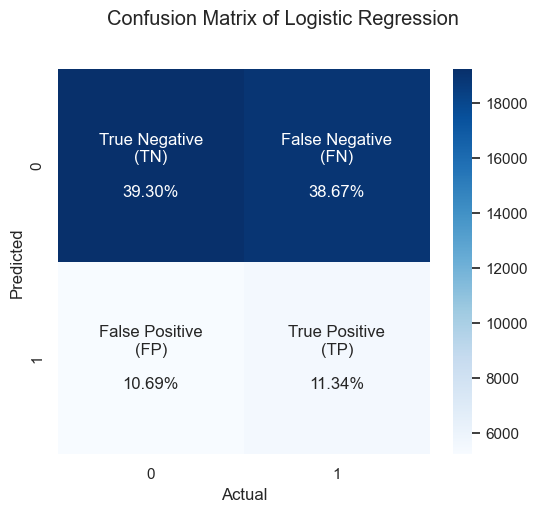

In [117]:
chart = 'Logistic Regression'

# plot the confusion matrix
plot_cm(cm, chart)

**Class 0**: BEV (Battery Electric Vehicle)<br>
**Class 1**: PHEV (Plug-in Hybrid Electric Vehicle)

<font size="4">Cross Validation</font>

In [118]:
# compute the cross-validation accuracy scores and ROC AUC scores for the untuned LR classifier
lr_before_tuned_cv_acc_scores = cross_val_score(LR_classifier, X_train_resampled, y_train_resampled, 
                                            cv=kf, n_jobs=-1, scoring='accuracy').mean()
lr_before_tuned_cv_rocauc_scores = cross_val_score(LR_classifier, X_train_resampled, y_train_resampled, 
                                            cv=kf, n_jobs=-1, scoring='roc_auc').mean()

# print the cross-validation results
print(f"The cross-validation accuracy and ROC AUC score for untuned {chart} after a 10 fold cross validation:")
print("Accuracy :", lr_before_tuned_cv_acc_scores)
print("ROC AUC  :", lr_before_tuned_cv_rocauc_scores)

The cross-validation accuracy and ROC AUC score for untuned Logistic Regression after a 10 fold cross validation:
Accuracy : 0.6113571750351523
ROC AUC  : 0.6117323876555932


In [119]:
print(LR_classifier.get_params())    

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


<font size="4"> Hyperparameter Tuning</font>

In [121]:
param_grid = {
    'penalty': ['l1', 'l2', '13', '14'],
    'C': [0.1, 1, 10, 20],
    'fit_intercept': [True, False],
    'class_weight': [None, 'balanced'],
    'max_iter': [100, 200, 300],
    'random_state': [None, 42, 21],
    'warm_start': [True, False]
}

# initialize GridSearchCV objects for accuracy and ROC AUC score
grid_lr_acc = GridSearchCV(LR_classifier, param_grid, cv=kf, n_jobs=-1, scoring='accuracy')
grid_lr_rocauc = GridSearchCV(LR_classifier, param_grid, cv=kf, n_jobs=-1, scoring='roc_auc')

# perform grid search for accuracy and ROC AUC score
grid_lr_acc.fit(X_train_resampled, y_train_resampled)
grid_lr_rocauc.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 20],
                         'class_weight': [None, 'balanced'],
                         'fit_intercept': [True, False],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', '13', '14'],
                         'random_state': [None, 42, 21],
                         'warm_start': [True, False]},
             scoring='roc_auc')

In [122]:
best_hyperparams_acc = grid_lr_acc.best_params_
best_hyperparams_rocauc = grid_lr_rocauc.best_params_

print("Best hyperparameters for accuracy and ROC AUC:")
print("Accuracy :\n", best_hyperparams_acc)
print("ROC AUC  :\n", best_hyperparams_rocauc)

lr_after_tuned_cv_acc_scores = grid_lr_acc.best_score_
lr_after_tuned_cv_rocauc_scores = grid_lr_rocauc.best_score_

print(f"\nThe cross-validation accuracy and ROC AUC score for tuned {chart} after a 10 fold cross validation:")
print("Accuracy :", lr_after_tuned_cv_acc_scores)
print("ROC AUC  :", lr_after_tuned_cv_rocauc_scores)

best_lr_model = grid_lr_acc.best_estimator_

Best hyperparameters for accuracy and ROC AUC:
Accuracy :
 {'C': 0.1, 'class_weight': None, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2', 'random_state': None, 'warm_start': True}
ROC AUC  :
 {'C': 0.1, 'class_weight': None, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2', 'random_state': None, 'warm_start': True}

The cross-validation accuracy and ROC AUC score for tuned Logistic Regression after a 10 fold cross validation:
Accuracy : 0.6113571750351523
ROC AUC  : 0.6117323876555932


In [123]:
best_lr_fit_for_train_data_acc = cross_val_score(best_lr_model, X_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1).mean()

best_lr_fit_for_train_data_rocauc = cross_val_score(best_lr_model, X_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Train Data")
print("Accuracy :", best_lr_fit_for_train_data_acc)
print("ROC AUC  :", best_lr_fit_for_train_data_rocauc)

best_lr_fit_for_test_data_acc = cross_val_score(best_lr_model, X_test, y_test, 
                                            cv=kf, n_jobs=-1).mean()
best_lr_fit_for_test_data_rocauc = cross_val_score(best_lr_model, X_test, y_test,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Test Data")
print("Accuracy :", best_lr_fit_for_test_data_acc)
print("ROC AUC  :", best_lr_fit_for_test_data_rocauc)

Train Data
Accuracy : 0.6113571750351523
ROC AUC  : 0.6117323876555932
Test Data
Accuracy : 0.7797546012269938
ROC AUC  : 0.4949114162617391


## Random Forest

In [124]:
# initialize the Random Forest classifier and fit it to the resampled training data
RF_classifier = RandomForestClassifier(n_estimators=100)
RF_classifier.fit(X_train_resampled, y_train_resampled)

# make predictions on the test data
y_pred = RF_classifier.predict(X_test)

# calculate metric evaluation and confusion matrix
accurary = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print the result
print("="*55)
print("Accuracy     :", accurary)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)

print("Confusion Matrix:\n\n", cm)
print("="*55)

Accuracy     : 0.9988957055214724
ROC AUC Score: 0.9992918961447679
Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     38130
           1       1.00      1.00      1.00     10770

    accuracy                           1.00     48900
   macro avg       1.00      1.00      1.00     48900
weighted avg       1.00      1.00      1.00     48900

Confusion Matrix:

 [[38076    54]
 [    0 10770]]


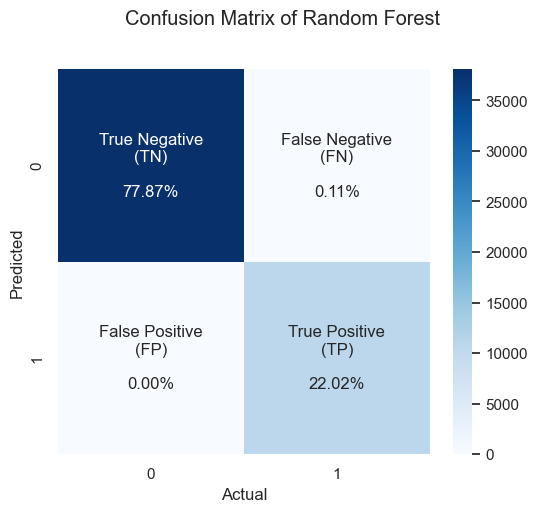

In [125]:
chart = 'Random Forest'

# plot the confusion matrix
plot_cm(cm, chart)

**Class 0**: BEV (Battery Electric Vehicle)<br>
**Class 1**: PHEV (Plug-in Hybrid Electric Vehicle)

<font size="4">Cross Validation</font>

In [127]:
# compute the cross-validation accuracy scores and ROC AUC scores for the untuned RF classifier
rf_before_tuned_cv_acc_scores = cross_val_score(RF_classifier, X_train_resampled, y_train_resampled, 
                                            cv=kf, n_jobs=-1, scoring='accuracy').mean()
rf_before_tuned_cv_rocauc_scores = cross_val_score(RF_classifier, X_train_resampled, y_train_resampled, 
                                            cv=kf, n_jobs=-1, scoring='roc_auc').mean()

# print the cross-validation results
print(f"The cross-validation accuracy and ROC AUC score for untuned {chart} after a 10 fold cross validation:")
print("Accuracy :", rf_before_tuned_cv_acc_scores)
print("ROC AUC  :", rf_before_tuned_cv_rocauc_scores)

The cross-validation accuracy and ROC AUC score for untuned Random Forest after a 10 fold cross validation:
Accuracy : 0.9996219776517588
ROC AUC  : 0.9999775618430451


In [128]:
print(RF_classifier.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


<font size="4">Hyperparameter Tuning</font>

In [129]:
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 5, 10],
    'bootstrap': [True, False],
}

# initialize GridSearchCV objects for accuracy and ROC AUC score
grid_rf_acc = GridSearchCV(RF_classifier, param_grid, cv=kf, n_jobs=-1, scoring='accuracy')
grid_rf_rocauc = GridSearchCV(RF_classifier, param_grid, cv=kf, n_jobs=-1, scoring='roc_auc')

# perform grid search for accuracy and ROC AUC score
grid_rf_acc.fit(X_train_resampled, y_train_resampled)
grid_rf_rocauc.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [None, 5, 10],
                         'n_estimators': [100, 150]},
             scoring='roc_auc')

In [130]:
best_hyperparams_acc = grid_rf_acc.best_params_
best_hyperparams_rocauc = grid_rf_rocauc.best_params_

print("Best hyperparameters for accuracy and ROC AUC:")
print("Accuracy :\n", best_hyperparams_acc)
print("ROC AUC  :\n", best_hyperparams_rocauc)

rf_after_tuned_cv_acc_scores = grid_rf_acc.best_score_
rf_after_tuned_cv_rocauc_scores = grid_rf_rocauc.best_score_

print(f"\nThe cross-validation accuracy and ROC AUC score for tuned {chart} after a 10 fold cross validation:")
print("Accuracy :", rf_after_tuned_cv_acc_scores)
print("ROC AUC  :", rf_after_tuned_cv_rocauc_scores)

best_rf_model = grid_rf_acc.best_estimator_

Best hyperparameters for accuracy and ROC AUC:
Accuracy :
 {'bootstrap': False, 'max_depth': None, 'n_estimators': 150}
ROC AUC  :
 {'bootstrap': True, 'max_depth': None, 'n_estimators': 100}

The cross-validation accuracy and ROC AUC score for tuned Random Forest after a 10 fold cross validation:
Accuracy : 0.9996219776517588
ROC AUC  : 0.9999964608620953


In [131]:
best_rf_fit_for_train_data_acc = cross_val_score(best_rf_model, X_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1).mean()

best_rf_fit_for_train_data_rocauc = cross_val_score(best_rf_model, X_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Train Data")
print("Accuracy :", best_rf_fit_for_train_data_acc)
print("ROC AUC  :", best_rf_fit_for_train_data_rocauc)

best_rf_fit_for_test_data_acc = cross_val_score(best_rf_model, X_test, y_test, 
                                            cv=kf, n_jobs=-1).mean()
best_rf_fit_for_test_data_rocauc = cross_val_score(best_rf_model, X_test, y_test,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Test Data")
print("Accuracy :", best_rf_fit_for_test_data_acc)
print("ROC AUC  :", best_rf_fit_for_test_data_rocauc)

Train Data
Accuracy : 0.9996219776517588
ROC AUC  : 0.999977957841031
Test Data
Accuracy : 0.9998159509202453
ROC AUC  : 0.9999999756327208


## XGBoost

In [132]:
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'gamma': 0,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# initialize the XGBoost classifier and fit it to the resampled training data
XGB_classifier = xgb.XGBClassifier(**params)
XGB_classifier.fit(X_train_resampled, y_train_resampled)

# make predictions on the test data
y_pred = XGB_classifier.predict(X_test)

# calculate metric evaluation and confusion matrix
accurary = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print the result
print("="*55)
print("Accuracy     :", accurary)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)

print("Confusion Matrix:\n\n", cm)
print("="*55)

Accuracy     : 0.9980572597137014
ROC AUC Score: 0.998720949515183
Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     38130
           1       0.99      1.00      1.00     10770

    accuracy                           1.00     48900
   macro avg       1.00      1.00      1.00     48900
weighted avg       1.00      1.00      1.00     48900

Confusion Matrix:

 [[38036    94]
 [    1 10769]]


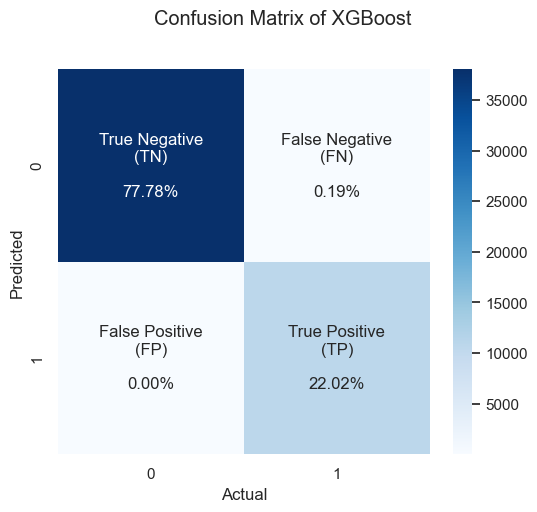

In [133]:
chart = 'XGBoost'

# plot the confusion matrix
plot_cm(cm, chart)

**Class 0**: BEV (Battery Electric Vehicle)<br>
**Class 1**: PHEV (Plug-in Hybrid Electric Vehicle)

<font size="4">Cross Validation</font>

In [134]:
# compute the cross-validation accuracy scores and ROC AUC scores for the untuned XGB classifier
xg_before_tuned_cv_acc_scores = cross_val_score(XGB_classifier, X_train_resampled, y_train_resampled, 
                                            cv=kf, n_jobs=-1, scoring='accuracy').mean()
xg_before_tuned_cv_rocauc_scores = cross_val_score(XGB_classifier, X_train_resampled, y_train_resampled, 
                                            cv=kf, n_jobs=-1, scoring='roc_auc').mean()

# print the cross-validation results
print(f"The cross-validation accuracy and ROC AUC score for untuned {chart} after a 10 fold cross validation:")
print("Accuracy :", xg_before_tuned_cv_acc_scores)
print("ROC AUC  :", xg_before_tuned_cv_rocauc_scores)

The cross-validation accuracy and ROC AUC score for untuned XGBoost after a 10 fold cross validation:
Accuracy : 0.9994230281034738
ROC AUC  : 0.9999885587810468


In [135]:
print(XGB_classifier.get_params())

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'gamma': 0, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 3, 'max_leaves': None, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.8, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'eta': 0.1, 'seed': 42}


<font size="4">Hyperparameter Tuning</font>

In [137]:
param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5],
    'random_state': [42, 21, 10]
}

# initialize GridSearchCV objects for accuracy and ROC AUC score
grid_xgb_acc = GridSearchCV(XGB_classifier, param_grid, cv=kf, n_jobs=-1, scoring='accuracy')
grid_xgb_rocauc = GridSearchCV(XGB_classifier, param_grid, cv=kf, n_jobs=-1, scoring='roc_auc')

# perform grid search for accuracy and ROC AUC score
grid_xgb_acc.fit(X_train_resampled, y_train_resampled)
grid_xgb_rocauc.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eta=0.1,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=0, grow_policy=None,
                                     importance_typ...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=3,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [3, 5],
                         'random_state': [42, 21, 10]},
             scoring='roc_auc')

In [138]:
best_hyperparams_acc = grid_xgb_acc.best_params_
best_hyperparams_rocauc = grid_xgb_rocauc.best_params_

print("Best hyperparameters for accuracy and ROC AUC:")
print("Accuracy :\n", best_hyperparams_acc)
print("ROC AUC  :\n", best_hyperparams_rocauc)

xgb_after_tuned_cv_acc_scores = grid_xgb_acc.best_score_
xgb_after_tuned_cv_rocauc_scores = grid_xgb_rocauc.best_score_

print(f"\nThe cross-validation accuracy and ROC AUC score for tuned {chart} after a 10 fold cross validation:")
print("Accuracy :", xgb_after_tuned_cv_acc_scores)
print("ROC AUC  :", xgb_after_tuned_cv_rocauc_scores)

best_xgb_model = grid_xgb_acc.best_estimator_

Best hyperparameters for accuracy and ROC AUC:
Accuracy :
 {'learning_rate': 0.1, 'max_depth': 5, 'random_state': 42}
ROC AUC  :
 {'learning_rate': 0.1, 'max_depth': 5, 'random_state': 42}

The cross-validation accuracy and ROC AUC score for tuned XGBoost after a 10 fold cross validation:
Accuracy : 0.9998010464937803
ROC AUC  : 0.9999996358002745


In [139]:
best_xgb_fit_for_train_data_acc = cross_val_score(best_xgb_model, X_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1).mean()

best_xgb_fit_for_train_data_rocauc = cross_val_score(best_xgb_model, X_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Train Data")
print("Accuracy :", best_xgb_fit_for_train_data_acc)
print("ROC AUC  :", best_xgb_fit_for_train_data_rocauc)

best_xgb_fit_for_test_data_acc = cross_val_score(best_xgb_model, X_test, y_test, 
                                            cv=kf, n_jobs=-1).mean()
best_xgb_fit_for_test_data_rocauc = cross_val_score(best_xgb_model, X_test, y_test,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Test Data")
print("Accuracy :", best_xgb_fit_for_test_data_acc)
print("ROC AUC  :", best_xgb_fit_for_test_data_rocauc)

Train Data
Accuracy : 0.9998010464937803
ROC AUC  : 0.9999996358002745
Test Data
Accuracy : 0.9999386503067484
ROC AUC  : 0.9999987761149525


## Model Evaluation

In [140]:
dict_result = {'Model' :['Naive Bayes', 'Logistic Regression', 'Random Forest', 'XGBoost'],
                "Accuracy (train)": [best_nb_fit_for_train_data_acc, best_lr_fit_for_train_data_acc, 
                                             best_rf_fit_for_train_data_acc, best_xgb_fit_for_train_data_acc],
                "Accuracy (test)": [best_nb_fit_for_test_data_acc, best_lr_fit_for_test_data_acc, 
                                            best_rf_fit_for_test_data_acc, best_xgb_fit_for_test_data_acc],
                "ROC-AUC (train)": [best_nb_fit_for_train_data_rocauc, best_lr_fit_for_train_data_rocauc, 
                                             best_rf_fit_for_train_data_rocauc, best_xgb_fit_for_train_data_rocauc],
                "ROC-AUC (test)": [best_nb_fit_for_test_data_rocauc, best_lr_fit_for_test_data_rocauc, 
                                            best_rf_fit_for_test_data_rocauc, best_xgb_fit_for_test_data_rocauc]}

model_result = pd.DataFrame(dict_result).sort_values(by=['ROC-AUC (test)', 'Accuracy (test)'], ascending= False).reset_index(drop=True)
model_result

Model  Accuracy (train)  Accuracy (test)  ROC-AUC (train)  \
0        Random Forest          0.999622         0.999816         0.999978   
1              XGBoost          0.999801         0.999939         1.000000   
2          Naive Bayes          0.562632         0.778957         0.776471   
3  Logistic Regression          0.611357         0.779755         0.611732   

   ROC-AUC (test)  
0        1.000000  
1        0.999999  
2        0.719056  
3        0.494911

<p style='text-align: justify;'> In this particular case, the relative proportions of False Positives (FP) and False Negatives (FN) do not have significant implications for the business. Consequently, the primary focus is to develop a model that can accurately predict the target variable. Therefore, the evaluation metrics employed are accuracy, which measures the proportion of correct predictions out of the total samples, and the ROC-AUC score, which assesses the model's ability to discriminate between the two classes. 

By prioritizing accuracy, the goal is to maximize the overall correctness of predictions without specifically emphasizing the trade-off between FP and FN. The ROC-AUC score provides a comprehensive measure of the model's performance across various classification thresholds and indicates the capability of the model to correctly rank the classes. This approach allows for a more balanced evaluation and selection of the model based on its ability to predict the target variable accurately.

The best model was chosen from the model that produced the highest average ROC-AUC score for the test data and does not indicate overfitting and underfitting. Based on the table above, the model chosen is **Random Forest** with an average **ROC-AUC score for test data of 0.999999**.</p>

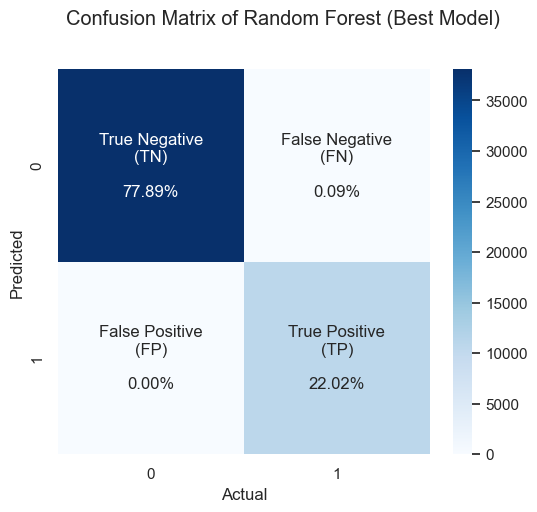

In [141]:
chart = 'Random Forest (Best Model)'

cm = confusion_matrix(y_test, best_rf_model.predict(X_test))

plot_cm(cm, chart)

**Class 0**: BEV (Battery Electric Vehicle)<br>
**Class 1**: PHEV (Plug-in Hybrid Electric Vehicle)

<p style='text-align: justify;'>The heatmap above shows the confusion matrix of the best model after the tuning process. Produces True Negative (TN) 76.68%, True Positive (TP) 23.22%, False Negative (FN) 0.00%, False Positive (FP) 0.10% which means the model has high accuracy in predicting class.</p>

## ROC AUC Curve

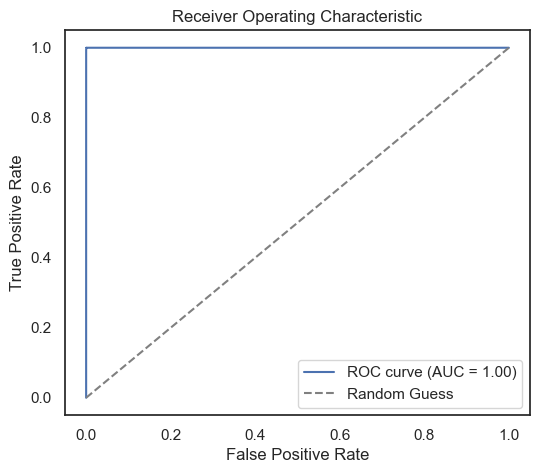

In [142]:
from sklearn.metrics import roc_curve, auc

y_prob = best_rf_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

<p style='text-align: justify;'>The graph above shows the ROC AUC curve with an almost perfect score of 0.999999. This means that the model works well in predicting each class.</p>

# Feature Importance

In [144]:
train1.shape

(162999, 18)

In [145]:
X = train1.drop('Electric Vehicle Type', axis=1)
y = train1['Electric Vehicle Type']

In [146]:
X.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Clean Alternative Fuel Vehicle Eligibility',
       'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Electric Utility', '2020 Census Tract', 'Longitude', 'Latitude'],
      dtype='object')

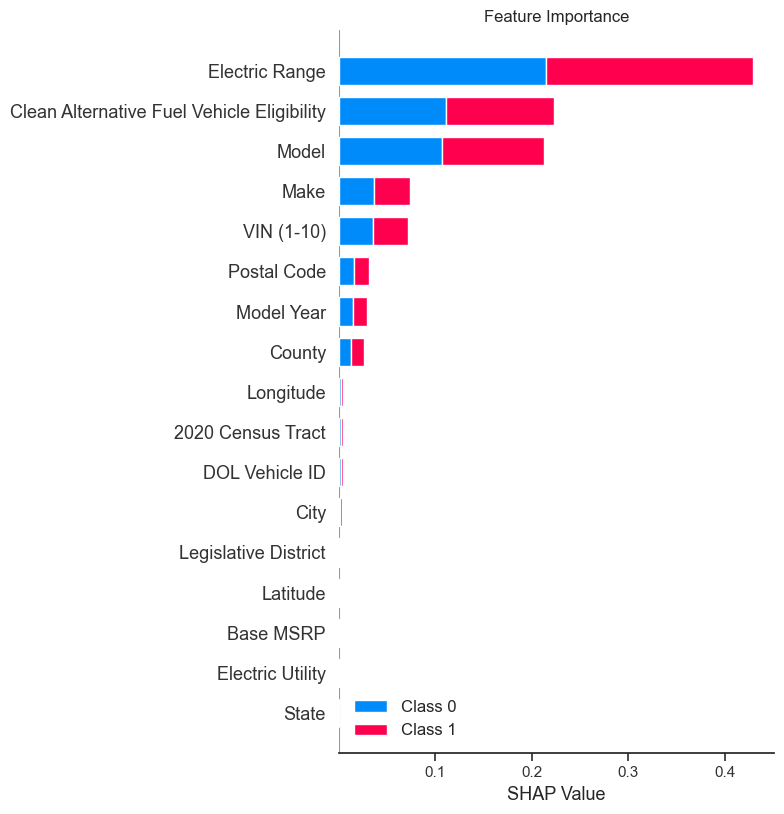

In [147]:
# define an explainer object using the best model, get the importance values, and plot into a bar plot
explainer = shap.TreeExplainer(best_rf_model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_type='bar', show=False)

plt.xlabel('SHAP Value')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

**Class 0**: BEV (Battery Electric Vehicle)<br>
**Class 1**: PHEV (Plug-in Hybrid Electric Vehicle)

<p style='text-align: justify;'>The plot of feature importance represents the relative importance of each feature in a machine learning model. It provides insights into which features have the most significant impact on the model's predictive performance. A higher importance score indicates a stronger influence on the model's predictions. These features can provide valuable insights into the underlying patterns or relationships in the data.

Based on the graph above, important features are known, such as 'Electric Range', 'Model', 'Clean Alternative Fuel Vehicle Eligibility', 'Make', and others.</p>

In [148]:
# get the importance values and convert to dataframe
importance = best_rf_model.feature_importances_

feature_importance = pd.DataFrame({'Feature': X.columns, 
                                   'Importance': importance})\
                                    .sort_values(by='Importance', ascending=False)\
                                    .reset_index(drop=True)
feature_importance.head()

Feature  Importance
0                              Electric Range    0.448774
1  Clean Alternative Fuel Vehicle Eligibility    0.188708
2                                       Model    0.162112
3                                        Make    0.063754
4                                  VIN (1-10)    0.049620

# Prediction

In [151]:
# create a dataframe to store the predictions and concatenate the predictions with the original train dataframe
predictions = pd.DataFrame({'Prediction': best_rf_model.predict(train1.drop('Electric Vehicle Type', axis=1))})
result = pd.concat([predictions, train1], axis=1).rename(columns={'Electric Vehicle Type': 'Actual', 'Prediction': 'Predicted'})

# select the desired columns for the result DataFrame
columns = ['Predicted', 'Actual', 'VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year', 'Make',
           'Model', 'Clean Alternative Fuel Vehicle Eligibility', 'Electric Range', 'Base MSRP',
           'Legislative District', 'DOL Vehicle ID', 'Electric Utility', '2020 Census Tract', 'Longitude', 'Latitude']
result = result[columns]

# map the numerical labels to their corresponding vehicle types
result['Electric Vehicle Type (Actual)'] = result['Actual'].map({1: 'PHEV', 0: 'BEV'})
result['Electric Vehicle Type (Predicted)'] = result['Predicted'].map({1: 'PHEV', 0: 'BEV'})

# convert specific columns to integer type
integer_columns = ['Predicted', 'Actual', 'Postal Code', 'Model Year', 'Electric Range', 'Base MSRP',
                   'Legislative District', '2020 Census Tract']
result[integer_columns] = result[integer_columns].astype('Int64')

result.head()

Predicted  Actual  VIN (1-10)  County  City  State  Postal Code  \
0          0       0          56    5880   865     40        98516   
1          0       0          56   84940  4756     40        98074   
2          0       0           3   84940  2522     40        98031   
3          1       1           1    5373   632     40        98370   
4          1       1           5    5880  3955     40        98501   

   Model Year  Make  Model  ...  Electric Range  Base MSRP  \
0        2020    33  31640  ...             291          0   
1        2019    27  13263  ...             150          0   
2        2016    33   5382  ...             200          0   
3        2021    14    812  ...              47          0   
4        2023     1    651  ...              23          0   

   Legislative District  DOL Vehicle ID  Electric Utility  2020 Census Tract  \
0                    22       124535071             96436        53067012221   
1                    45       102359449             96436        53033032318   
2                    33       228682037             96436        53033029305   
3                    23       171566447             96436        53035090400   
4                    22       234923230             96436        53067010400   

    Longitude   Latitude  Electric Vehicle Type (Actual)  \
0 -122.747429  47.082112                             BEV   
1 -122.031327  47.628578                             BEV   
2 -122.201252  47.393181                             BEV   
3 -122.641770  47.737525                            PHEV   
4 -122.896920  47.043535                            PHEV   

  Electric Vehicle Type (Predicted)  
0                               BEV  
1                               BEV  
2                               BEV  
3                              PHEV  
4                              PHEV  

[5 rows x 21 columns]

In [152]:
# export data to csv file
result.to_csv('result.csv', index=False)
feature_importance.to_csv('feature_importance.csv', index=False)

<p style='text-align: justify;'>Based on the entire process, the following are the results:

- The best model obtained is Random Forest which produces accuracy and ROC-AUC scores of 0.999617 and 0.999998, respectively.
- Electric vehicles of the BEV (Battery Electric Vehicle) type have the largest percentage of 78%.
- King County has the highest number of electric vehicles with 42.1% for BEV and 10% for PHEV.
- The city of Seattle has the second highest number of electric vehicles at 13.3% for BEV and 3.5% for PHEV.
- Washington state is the state with the most electric vehicles with a total percentage of 99.7% (BEV and PHEV).
- Electric vehicles with a model year of 2023 account for the largest share with 23.1% for BEV and 4.1% for PHEV.
- Electric vehicles made by Tesla were the most numerous with 45.1% (BEV and PHEV).
- Electric vehicles are most likely to meet the clean fuel (low emission) vehicle eligibility requirements at 49.1% (BEV and PHEV), followed by electric vehicles with unknown eligibility status at 41% (BEV and PHEV), and electric vehicles with ineligible status at 12.6% (BEV and PHEV).
- Electric vehicles with Puget Sound Energy electric utilities were the most common at 59.2% (BEV and PHEV).</p>